In [2]:
!pip install kagglehub

# Hands On Data Analysis: Vehicle Sales Data
- **Team :** Machine Learning GDGoC : Universitas Sriwijaya
- **Topic :** Manual Data Analysis
- **Notebook Creator :** Aditya Bayhaqie
- [Dataset](https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data/code)

---

*Please Copy the Notebook before Running it*

---

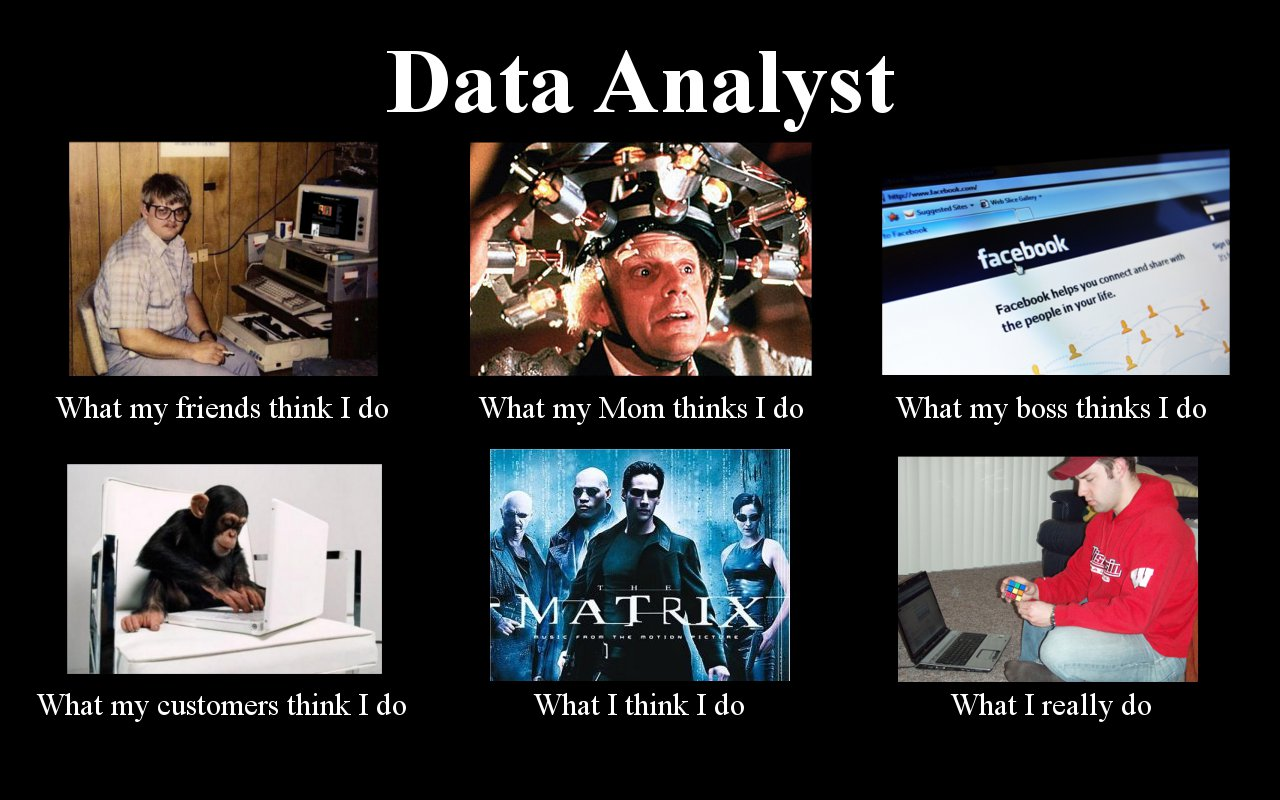

## Menentukan Pertanyaan Bisnis

- What factors influence vehicle pricing the most? (e.g., mileage, brand, model, condition, year)
- Which car brands/models retain their value best over time?
- What are the most common features & specifications consumers look for in a vehicle?

#### Importing Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime
import kagglehub
from kagglehub import KaggleDatasetAdapter
import re # For Imputation
from sklearn.preprocessing import LabelEncoder # For data Encoding

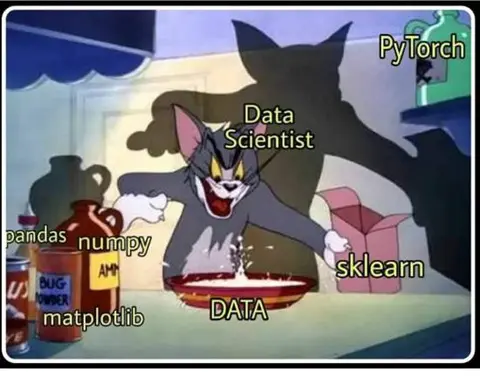

## Data Wrangling

### Gathering Data

In [4]:
! kaggle datasets download syedanwarafridi/vehicle-sales-data

Dataset URL: https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data
License(s): MIT
 90% 17.0M/18.8M [00:00<00:00, 75.3MB/s]
100% 18.8M/18.8M [00:00<00:00, 76.0MB/s]


In [5]:
! unzip vehicle-sales-data.zip # Any Prediction type Competition

Archive:  vehicle-sales-data.zip
  inflating: car_prices.csv          


#### Assigning Data Variables

In [6]:
df_data = pd.read_csv("/content/car_prices.csv")
df_data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


### Data Assesment

Data Assesment penting untuk dapat memahami dan mengetahui data, hal ini nantinya dapat membantu kita dalam menarik kesimpulan yang jauh lebih baik dan Jika data ini digunakan untuk sebagai Training dan Test data untuk Model, it would increase the Accuracy!

#### Assessing Data in General

One thing to be sure, liat dulu nih data yang mau kita pake, syukurnya (riil) cuma ada satu file `.csv` yang kita coba asses, untuk bagian ini, kita fokus dulu buat liat konten dari datanya secara umum!

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


Data 'saledate' tidak bertipe `datetime`, we'll surely changed that~

In [8]:
df_data.isna().sum()

,0
year,0
make,10301
model,10399
trim,10651
body,13195
transmission,65352
vin,4
state,0
condition,11820
odometer,94


Cukup banyak data `NULL` yang ada, which means we have to do something about it, dari materi yang udah kita jelasin kemaren,beberapa cara yang sering dipake itu adalah

- Drop Datanya
- Modifikasi Datanya, biasanya metode yang dipake :
  - Ambil Nilai Tengah (Dapat mempengaruhi akurasi pengambilan kesimpulan dan model prediksi)
  - Ambil Nilai Rata - rata (Dapat mempengaruhi akurasi pengambilan kesimpulan dan model prediksi)
  - Imputation (Imputasi adalah proses mengganti data yang hilang dengan nilai yang diganti)







In [9]:
df_data.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


- Year terlihat normal dari perseberan datanya
- Condition juga terlihat aman dari perseberan datanya
- Odometer (in my opinion) kurang normal, karena Minimum Odometer dari data adalah 1, yang berarti Mobil tersebut hanya dipakai 1 KM saja
- MMR juga sama, MMR Biasanya menyentuh angka ribuan (dalam hal ini Dollar) sedangkan minimum yang kita temukan adalah 25
- Sellingprice juga memiliki permasalahan yang sama

In [10]:
print("Data Duplikat : ",df_data.duplicated().sum())

Data Duplikat :  0


####Data Column Analysis with Visualization

Analisis ini digunakan untuk
- Mengecek Konten dari tiap Kolum pada Dataset
- Menganalisa Persebaran data pada tiap Kolum

######Year

Data Normal, Tidak perlu modifikasi

year
2012    102315
2013     98168
2014     81070
2011     48548
2008     31502
2007     30845
2006     26913
2010     26485
2005     21394
2009     20594
2004     17342
2003     13281
2002      9715
2015      9437
2001      6468
2000      5227
1999      3363
1998      2149
1997      1546
1996       851
1995       711
1994       392
1993       205
1992       132
1991        67
1990        49
1989        20
1986        11
1988        11
1985        10
1987         8
1984         5
1982         2
1983         1
Name: count, dtype: int64


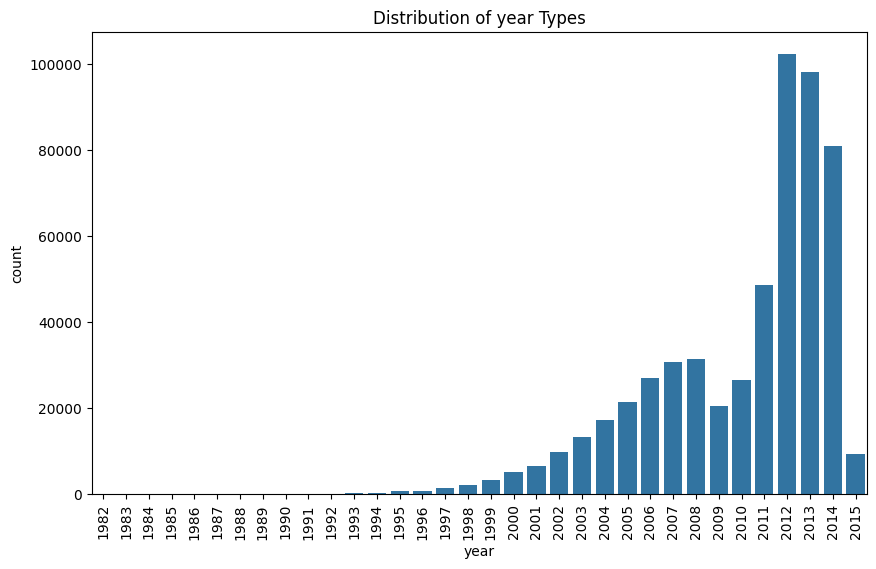

In [11]:
# Frequency Analysis
print(df_data['year'].value_counts())

# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df_data)
plt.title('Distribution of year Types')
plt.xticks(rotation=90)
plt.show()

######Creator

Data Normal, Drop Null saja~

In [12]:
# Frequency Analysis
print(df_data['make'].value_counts())

make
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: count, Length: 96, dtype: int64


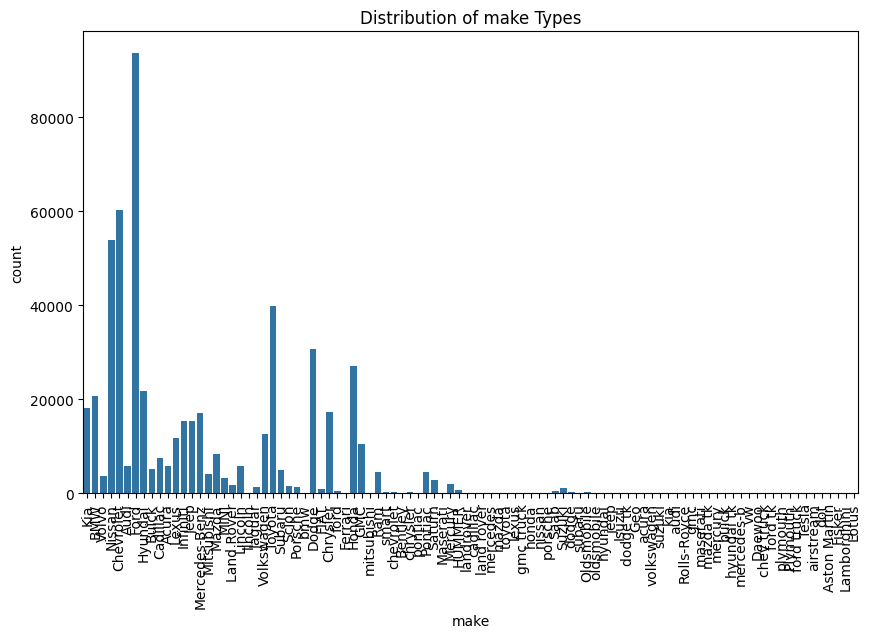

In [13]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='make', data=df_data)
plt.title('Distribution of make Types')
plt.xticks(rotation=90)
plt.show()

Mari Kita cek apakah kita bisa melihat data produsen mobil dari datarow `model`, `trim`, dan `body`

In [14]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_make = df_data[df_data['make'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['model'])

# Buat Analisa lebih dalam, coba ganti sort_values dengan kolom lain seperti `trim` atau `body`
# null_make = df_data[df_data['make'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['trim'])
# null_make = df_data[df_data['make'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['body'])

# Tampilkan baris dengan nilai Null di kolom 'make'
print("Baris dengan Nilai Null di Kolom 'make':")
display(null_make)

Baris dengan Nilai Null di Kolom 'make':


,make,model,trim,body,transmission,vin
742,NaN,NaN,NaN,NaN,automatic,wbakb8c51cc964387
747,NaN,NaN,NaN,NaN,automatic,wbakb8c53cc964410
766,NaN,NaN,NaN,NaN,automatic,wbakb8c54cc964089
798,NaN,NaN,NaN,NaN,automatic,wbakb8c59cc448049
803,NaN,NaN,NaN,NaN,automatic,wbakb8c58cc962863
...,...,...,...,...,...,...
558545,NaN,NaN,NaN,NaN,automatic,4n2xn11txyd844711
558617,NaN,NaN,NaN,NaN,automatic,jtjbt20x770129305
558736,NaN,NaN,NaN,NaN,automatic,4a4jn2as6be029938
558773,NaN,NaN,NaN,NaN,automatic,1g1yy24u355116011


Karena Data berkaitan kosong, kita drop aja~

######Model

Data Normal, Drop Null dan Modifikasi Data

In [15]:
# Frequency Analysis
print(df_data['model'].value_counts())

model
Altima        19349
F-150         14479
Fusion        12946
Camry         12545
Escape        11861
              ...  
rrs               1
golf              1
g500              1
tahoe             1
458 Italia        1
Name: count, Length: 973, dtype: int64


Mari kita cek `make`,`trim` dan `body`

PS : Soalnya kalo ada datanya, bisa kita Prediksi dan isi aja guys datanya~

In [16]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_make = df_data[df_data['model'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['make'])

# Buat Analisa lebih dalam, coba ganti sort_values dengan kolom lain seperti `trim` atau `body`
# null_make = df_data[df_data['model'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['trim'])
# null_make = df_data[df_data['model'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['body'])

# Tampilkan baris dengan nilai Null di kolom 'make'
print("Baris dengan Nilai Null di Kolom 'model':")
print(null_make)

Baris dengan Nilai Null di Kolom 'model':
        make model                      trim   body transmission  \
553665  Audi   NaN  2.0 TFSI Premium quattro  sedan    automatic   
552124  Audi   NaN  2.0 TFSI Premium quattro  sedan    automatic   
410045  Audi   NaN  2.0 TFSI Premium quattro  Sedan          NaN   
70510   Audi   NaN  2.0 TFSI Premium quattro  Sedan          NaN   
351561  Audi   NaN  2.0 TFSI Premium quattro  Sedan    automatic   
...      ...   ...                       ...    ...          ...   
558545   NaN   NaN                       NaN    NaN    automatic   
558617   NaN   NaN                       NaN    NaN    automatic   
558736   NaN   NaN                       NaN    NaN    automatic   
558773   NaN   NaN                       NaN    NaN    automatic   
558776   NaN   NaN                       NaN    NaN    automatic   

                      vin  
553665  waubfgff0f1043524  
552124  waubfgffxf1005315  
410045  waubfgffxf1002043  
70510   waubfgff7f1009810  
3

Wah ada nih, coba kita cek berapa banyak data yang bisa kita scraping

In [17]:
# Filter untuk nilai Null di kolom 'model' dan pastikan 'make', 'trim', dan 'body' memiliki nilai
filtered_model = df_data[df_data['model'].isnull() & df_data['make'].notnull() & df_data['trim'].notnull() & df_data['body'].notnull()]

# Tampilkan baris yang difilter
print("Baris dengan Nilai Null di Kolom 'model' tetapi 'make', 'trim', dan 'body' memiliki nilai:")
display(filtered_model[['make', 'model', 'trim', 'body']])

Baris dengan Nilai Null di Kolom 'model' tetapi 'make', 'trim', dan 'body' memiliki nilai:


,make,model,trim,body
72,BMW,NaN,750Li,Sedan
31262,BMW,NaN,750i,Sedan
61951,BMW,NaN,750Li xDrive,Sedan
61955,BMW,NaN,750Li xDrive,Sedan
61956,BMW,NaN,750i,Sedan
...,...,...,...,...
546744,BMW,NaN,750Li xDrive,sedan
549010,BMW,NaN,750Li xDrive,sedan
549011,BMW,NaN,750Li,sedan
552124,Audi,NaN,2.0 TFSI Premium quattro,sedan


Wah ternyata rata - rata Produsennya BMW sama Audi, Kita bakalan coba buat modifikasi datanya dulu ya, caranya gimana kalo dipermasalahan ini, prosesnya itu :
- Cari data dengan `make`, `trim` dan `body` yang sama
- Ganti dengan data yang tersedia

######Trim

Data Normal, Drop Null dan Modifikasi Data

In [18]:
# Frequency Analysis
print(df_data['trim'].value_counts())

trim
Base                 55817
SE                   43648
LX                   20757
Limited              18367
LT                   16915
                     ...  
xls                      1
series m                 1
4x2 reg silverado        1
4x2 v6 limited           1
Power Wagon              1
Name: count, Length: 1963, dtype: int64


In [19]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_make = df_data[df_data['trim'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['make'])

# Buat Analisa lebih dalam, coba ganti sort_values dengan kolom lain seperti `trim` atau `body`
# null_make = df_data[df_data['model'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['model'])
# null_make = df_data[df_data['model'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['body'])

# Tampilkan baris dengan nilai Null di kolom 'make'
print("Baris dengan Nilai Null di Kolom 'model':")
print(null_make)

Baris dengan Nilai Null di Kolom 'model':
             make   model trim body transmission                vin
556917  Chevrolet  malibu  NaN  NaN    automatic  1g1zb5eb9af220611
550571  Chevrolet  malibu  NaN  NaN    automatic  1g1zb5eb4af307705
501496  Chevrolet  malibu  NaN  NaN    automatic  1g1zb5eb9af226019
505288  Chevrolet  malibu  NaN  NaN    automatic  1g1zb5eb5af203787
509803  Chevrolet  malibu  NaN  NaN    automatic  1g1zb5eb3af222872
...           ...     ...  ...  ...          ...                ...
558545        NaN     NaN  NaN  NaN    automatic  4n2xn11txyd844711
558617        NaN     NaN  NaN  NaN    automatic  jtjbt20x770129305
558736        NaN     NaN  NaN  NaN    automatic  4a4jn2as6be029938
558773        NaN     NaN  NaN  NaN    automatic  1g1yy24u355116011
558776        NaN     NaN  NaN  NaN    automatic  zam39nka2d0068288

[10651 rows x 6 columns]


Coba kita liat datanya worth modified atau tidak

In [20]:
# Filter untuk nilai Null di kolom 'model' dan pastikan 'make', 'trim', dan 'body' memiliki nilai
filtered_model = df_data[df_data['trim'].isnull() & df_data['make'].notnull() & df_data['model'].notnull()]

# Tampilkan baris yang difilter
print("Baris dengan Nilai Null di Kolom 'model' tetapi 'make', 'trim', dan 'body' memiliki nilai:")
display(filtered_model[['make', 'model', 'trim', 'body']])

Baris dengan Nilai Null di Kolom 'model' tetapi 'make', 'trim', dan 'body' memiliki nilai:


,make,model,trim,body
1736,mitsubishi,galant,NaN,NaN
3395,chevrolet,corvette,NaN,NaN
3499,mercedes,c230wz,NaN,NaN
3527,mazda,cx-7,NaN,NaN
3550,toyota,matrix,NaN,NaN
...,...,...,...,...
541919,Honda,accord,NaN,NaN
548316,Chevrolet,malibu,NaN,NaN
548323,Chevrolet,malibu,NaN,NaN
550571,Chevrolet,malibu,NaN,NaN


Oke, kita bakal coba modify yah

######Body

Data Normal, Drop Null dan Modifikasi Data

body
Sedan          199437
SUV            119292
sedan           41906
suv             24552
Hatchback       21380
                ...  
cab plus 4          1
g37 coupe           1
CTS-V Wagon         1
Ram Van             1
cts wagon           1
Name: count, Length: 87, dtype: int64


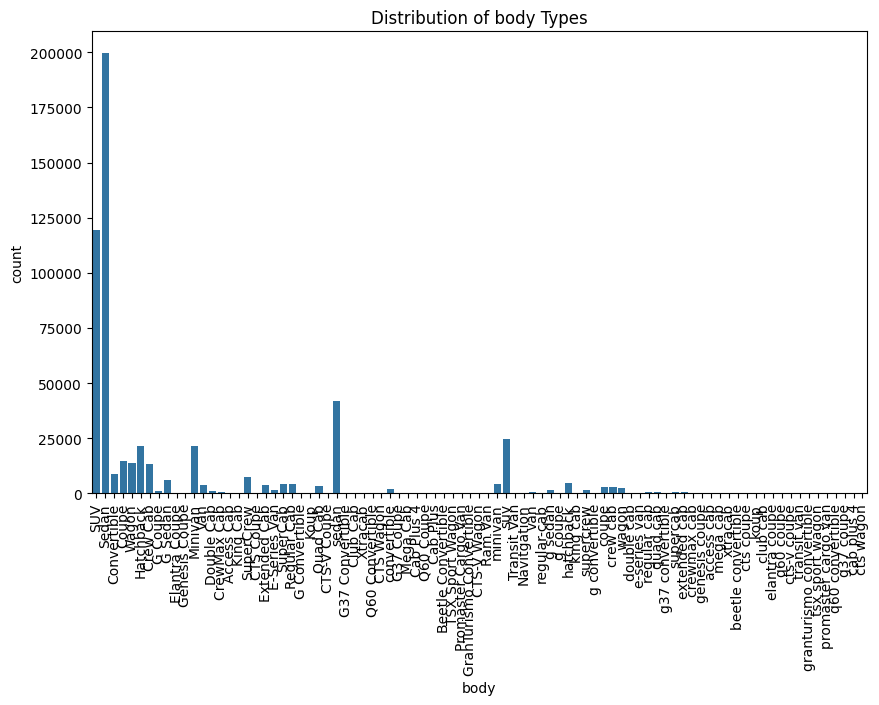

In [21]:
# Frequency Analysis
print(df_data['body'].value_counts())

# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='body', data=df_data)
plt.title('Distribution of body Types')
plt.xticks(rotation=90)
plt.show()

In [22]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_make = df_data[df_data['body'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['make'])

# Buat Analisa lebih dalam, coba ganti sort_values dengan kolom lain seperti `trim` atau `body`
# null_make = df_data[df_data['model'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['model'])
# null_make = df_data[df_data['model'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['trim'])

# Tampilkan baris dengan nilai Null di kolom 'make'
print("Baris dengan Nilai Null di Kolom 'trim':")
print(null_make)

Baris dengan Nilai Null di Kolom 'trim':
             make   model trim body transmission                vin
556917  Chevrolet  malibu  NaN  NaN    automatic  1g1zb5eb9af220611
470113  Chevrolet  malibu  NaN  NaN    automatic  1g1zb5eb2af175690
501496  Chevrolet  malibu  NaN  NaN    automatic  1g1zb5eb9af226019
505288  Chevrolet  malibu  NaN  NaN    automatic  1g1zb5eb5af203787
509803  Chevrolet  malibu  NaN  NaN    automatic  1g1zb5eb3af222872
...           ...     ...  ...  ...          ...                ...
558545        NaN     NaN  NaN  NaN    automatic  4n2xn11txyd844711
558617        NaN     NaN  NaN  NaN    automatic  jtjbt20x770129305
558736        NaN     NaN  NaN  NaN    automatic  4a4jn2as6be029938
558773        NaN     NaN  NaN  NaN    automatic  1g1yy24u355116011
558776        NaN     NaN  NaN  NaN    automatic  zam39nka2d0068288

[13195 rows x 6 columns]


Mari kita cek Data nullnya

In [23]:
# Filter untuk nilai Null di kolom 'model' dan pastikan 'make', 'trim', dan 'body' memiliki nilai
filtered_model = df_data[df_data['body'].isnull() & df_data['make'].notnull() & df_data['model'].notnull() & df_data['trim'].notnull()]

# Tampilkan baris yang difilter
print("Baris dengan Nilai Null di Kolom 'model' tetapi 'make', 'trim', dan 'body' memiliki nilai:")
display(filtered_model[['make', 'model', 'trim', 'body']])

Baris dengan Nilai Null di Kolom 'model' tetapi 'make', 'trim', dan 'body' memiliki nilai:


,make,model,trim,body
468,lincoln,mkt,awd v6,NaN
743,bmw,750i,xdr 750i xdriv,NaN
770,bmw,750li,750li,NaN
793,bmw,750i,750i,NaN
794,bmw,750li,750li,NaN
...,...,...,...,...
143161,ford,expeditn,el 4x4 limited,NaN
143419,cadillac,srx,awd v6 awd,NaN
145012,kia,borrego,lx,NaN
145861,ford,explorer,4x4 v6 xlt,NaN


Alamak, banyak datanya, bolela kita Modifikasi atau kita Imputasi datanya~

######Transmission
Terdapat Anomali Data, cek Row dan Cell Terkait

transmission
automatic    475915
manual        17544
sedan            15
Sedan            11
Name: count, dtype: int64


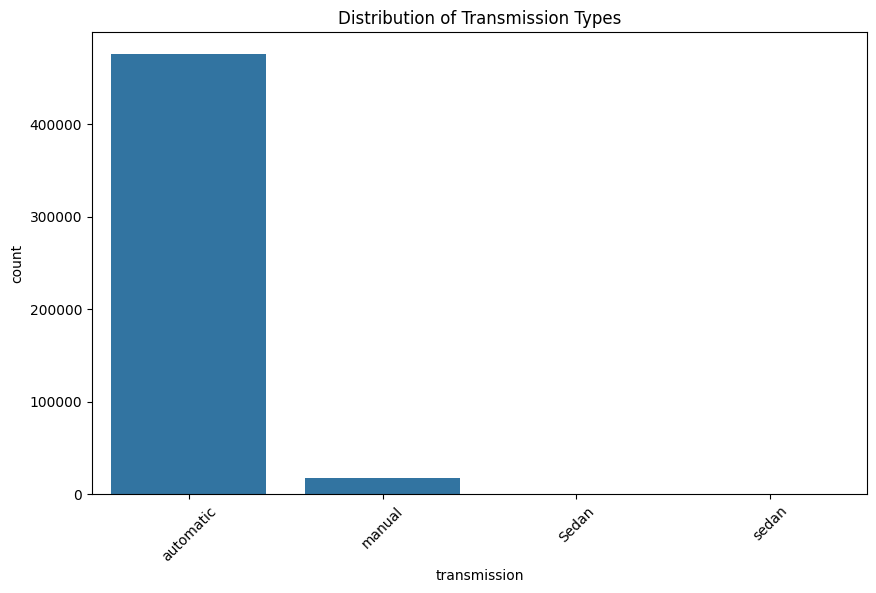

In [24]:
# Frequency Analysis
print(df_data['transmission'].value_counts())

# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='transmission', data=df_data)
plt.title('Distribution of Transmission Types')
plt.xticks(rotation=45)
plt.show()

---
Mari Kita cek Row dari content `Sedan` dan `sedan`

In [25]:
# Dapatkan jumlah nilai untuk kolom 'transmission'
transmission_counts = df_data['transmission'].value_counts()

# Filter untuk nilai "sedan" dan "Sedan"
highlighted_transmissions = transmission_counts[transmission_counts.index.isin(['sedan', 'Sedan'])]

# Cetak atau tampilkan transmisi yang disorot
print("Transmisi yang Disorot ('sedan' dan 'Sedan'):")
print(highlighted_transmissions)

# Filter dan urutkan df_data untuk kolom yang diinginkan
filtered_df = df_data[['transmission', 'vin', 'state', 'condition', 'odometer']].sort_values(by=['vin'])

# Sekarang, 'filtered_df' berisi data Kalian, dan 'highlighted_transmissions' menyoroti transmisi tertentu

# Misalnya, Kalian dapat memfilter 'filtered_df' untuk baris di mana 'transmission' berada di 'highlighted_transmissions.index'
filtered_highlighted_df = filtered_df[filtered_df['transmission'].isin(highlighted_transmissions.index)]

print("\nDataFrame yang Difilter dengan Transmisi yang Disorot:")
print(filtered_highlighted_df)

Transmisi yang Disorot ('sedan' dan 'Sedan'):
transmission
sedan    15
Sedan    11
Name: count, dtype: int64

DataFrame yang Difilter dengan Transmisi yang Disorot:
       transmission        vin              state  condition  odometer
421289        Sedan  automatic  3vwd17aj3fm276741        NaN      46.0
434424        Sedan  automatic  3vwd17aj7fm223475        NaN      46.0
427040        Sedan  automatic  3vwd17aj0fm227318        NaN      41.0
501455        sedan  automatic  3vwd17aj6fm231972        NaN      38.0
554710        sedan  automatic  3vwd17aj2fm261566        NaN      48.0
408161        Sedan  automatic  3vwd17aj4fm201708        NaN      46.0
548784        sedan  automatic  3vwd17aj7fm326640        NaN       2.0
444501        Sedan  automatic  3vwd17aj5fm297123        NaN       2.0
427043        Sedan  automatic  3vwd17aj6fm218641        NaN      49.0
417835        Sedan  automatic  3vwd17aj2fm258506        NaN       1.0
497011        sedan  automatic  3vwd17aj5fm221322     

Dari sini kita bisa tarik **Kesimpulan** :
- Adanya [Outlier](https://www.google.com/search?q=what+is+outlier+in+data+analysis&sca_esv=540846efa2b16f65&rlz=1C1CHBF_enID1069ID1069&sxsrf=AHTn8zr_ltQBkMJwFZWXH7alcJrThZpVEA%3A1741367320023&ei=GCjLZ8qRAc-D4-EPsIPakQk&oq=What+is+Outlier+in+data&gs_lp=Egxnd3Mtd2l6LXNlcnAiF1doYXQgaXMgT3V0bGllciBpbiBkYXRhKgIIAjIGEAAYBxgeMgYQABgHGB4yCBAAGIAEGMsBMggQABiABBjLATIIEAAYgAQYywEyCBAAGIAEGMsBMggQABiABBjLATIIEAAYgAQYywEyBhAAGAoYHjIEEAAYHkjrMFC2BViGGnABeAGQAQCYAfMCoAGpEKoBBzAuMy4xLjS4AQPIAQD4AQGYAgmgAvwQwgIKEAAYsAMY1gQYR8ICDRAAGIAEGLADGEMYigXCAgYQABgWGB7CAggQABiABBiiBMICBRAAGO8FwgIHECEYoAEYCsICCRAAGIAEGBMYDcICChAAGBMYChgNGB7CAggQABgTGA0YHsICChAAGBMYFhgKGB7CAggQABgTGBYYHpgDAIgGAZAGCpIHBzEuMS4zLjSgB4Qu&sclient=gws-wiz-serp) yang nanti dapat mempengaruhi Value dari data yang tengah kita *Assess*

*PS : Data Outlier ini karena salah Data Entry juga deh...*

######Vin
Terdapat Anomali Data, cek Row dan Cell Terkait

In [26]:
# Frequency Analysis
print(df_data['vin'].value_counts())

vin
automatic            22
wbanv13588cz57827     5
5uxfe43579l274932     4
trusc28n241022003     4
wddgf56x78f009940     4
                     ..
1p3ew65g7yv603989     1
4t1bf28b1yu016829     1
jtdbt1231y0082703     1
jtddr32t8y0063746     1
1ftfw1et2eke87277     1
Name: count, Length: 550297, dtype: int64


In [27]:
print("Data serta Column yang terduplikat")
print(df_data[df_data.duplicated(subset=['vin'], keep=False)][['transmission', 'vin', 'state', 'condition', 'odometer', 'seller']].sort_values(by=['vin']))

Data serta Column yang terduplikat
       transmission                vin              state  condition  \
49021     automatic  19uua5663ya022038                 fl       19.0   
218119    automatic  19uua5663ya022038                 fl       19.0   
160618       manual  19uua65596a059705                 nj       26.0   
344335       manual  19uua65596a059705                 nj       25.0   
136582    automatic  19uua66215a070166                 ca       37.0   
...             ...                ...                ...        ...   
129433    automatic  zfbcfabh4ez025834                 fl        4.0   
461612        Sedan                NaN  3vwd17aj3fm259017        NaN   
505299        sedan                NaN  3vwd17aj7fm222388        NaN   
529009        sedan                NaN  3vwd17aj8fm298895        NaN   
551222        sedan                NaN  3vwd17aj8fm239622        NaN   

        odometer                          seller  
49021   105420.0  autonation toyota scion weston 

Dari sini kita bisa tarik **Kesimpulan** :
- Adanya [Outlier](https://www.google.com/search?q=what+is+outlier+in+data+analysis&sca_esv=540846efa2b16f65&rlz=1C1CHBF_enID1069ID1069&sxsrf=AHTn8zr_ltQBkMJwFZWXH7alcJrThZpVEA%3A1741367320023&ei=GCjLZ8qRAc-D4-EPsIPakQk&oq=What+is+Outlier+in+data&gs_lp=Egxnd3Mtd2l6LXNlcnAiF1doYXQgaXMgT3V0bGllciBpbiBkYXRhKgIIAjIGEAAYBxgeMgYQABgHGB4yCBAAGIAEGMsBMggQABiABBjLATIIEAAYgAQYywEyCBAAGIAEGMsBMggQABiABBjLATIIEAAYgAQYywEyBhAAGAoYHjIEEAAYHkjrMFC2BViGGnABeAGQAQCYAfMCoAGpEKoBBzAuMy4xLjS4AQPIAQD4AQGYAgmgAvwQwgIKEAAYsAMY1gQYR8ICDRAAGIAEGLADGEMYigXCAgYQABgWGB7CAggQABiABBiiBMICBRAAGO8FwgIHECEYoAEYCsICCRAAGIAEGBMYDcICChAAGBMYChgNGB7CAggQABgTGA0YHsICChAAGBMYFhgKGB7CAggQABgTGBYYHpgDAIgGAZAGCpIHBzEuMS4zLjSgB4Qu&sclient=gws-wiz-serp) yang nanti dapat mempengaruhi Value dari data yang tengah kita *Assess*
- Data *Duplicate* pada VIN atau *Vehicle Identification Number* yang merupakan *Unique Number* dianggap normal karena adanya perbedaan pada Odometer, Jika ada perbedaan data terutama pada Odometer, kita bisa mengambil Scenario dimana
  - Pembeli Menjual Kembali Mobilnya
  - Pembeli mengembalikan Mobil ke Dealership karena alasan tertentu

######State
Terdapat Anomali Data, cek Row dan Cell Terkait

state
fl                   82945
ca                   73148
pa                   53907
tx                   45913
ga                   34750
                     ...  
3vwd17aj2fm285365        1
3vwd17aj3fm276741        1
3vwd17aj2fm258506        1
3vwd17aj4fm201708        1
3vwd17aj2fm261566        1
Name: count, Length: 64, dtype: int64


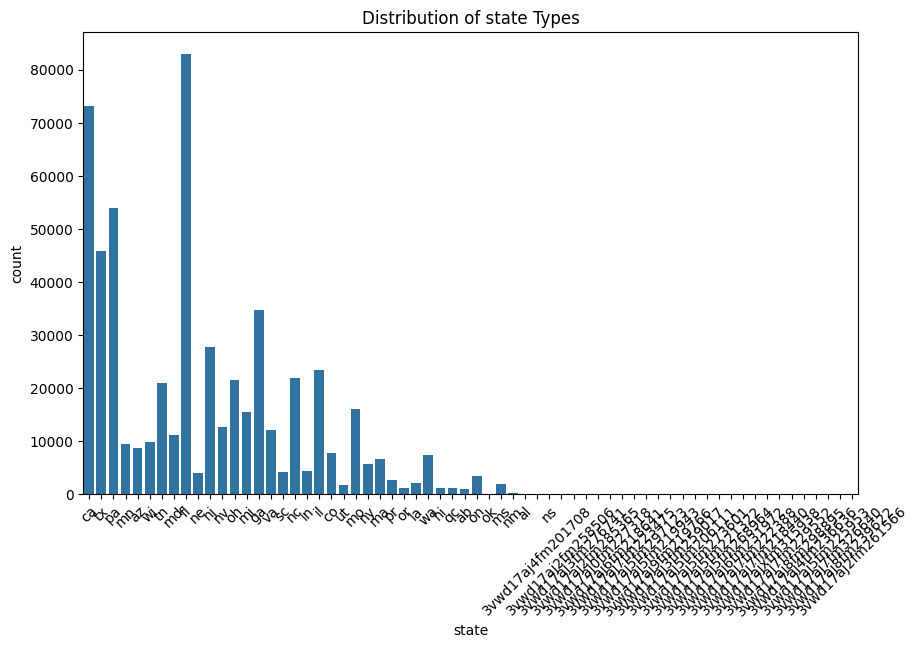

In [28]:
# Frequency Analysis
print(df_data['state'].value_counts())

# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='state', data=df_data)
plt.title('Distribution of state Types')
plt.xticks(rotation=45)
plt.show()

Ada Anomali ges, mari kita analisa data row dari value ini

*PS : (kayaknya ini data VIN deh, salah entry!)*

In [29]:
# Dapatkan jumlah nilai untuk kolom 'state'
state_counts = df_data['state'].value_counts()

# Filter untuk state yang dimulai dengan "3vwd"
highlighted_states = state_counts[state_counts.index.str.startswith('3vwd')]

# Filter dan urutkan df_data untuk kolom yang diinginkan
filtered_df = df_data[['transmission', 'vin', 'state', 'condition', 'odometer']].sort_values(by=['state'])

# Sekarang, 'filtered_df' berisi data Anda, dan 'highlighted_states' menyoroti state tertentu

# Misalnya, Kamu dapat memfilter 'filtered_df' untuk baris di mana 'state' berada di 'highlighted_states.index'
filtered_highlighted_df = filtered_df[filtered_df['state'].isin(highlighted_states.index)]

print("\nDataFrame yang Difilter dengan State yang Disorot:")
print(filtered_highlighted_df)


DataFrame yang Difilter dengan State yang Disorot:
       transmission        vin              state  condition  odometer
427040        Sedan  automatic  3vwd17aj0fm227318        NaN      41.0
417835        Sedan  automatic  3vwd17aj2fm258506        NaN       1.0
554710        sedan  automatic  3vwd17aj2fm261566        NaN      48.0
424161        Sedan  automatic  3vwd17aj2fm285365        NaN       1.0
461612        Sedan        NaN  3vwd17aj3fm259017        NaN      46.0
421289        Sedan  automatic  3vwd17aj3fm276741        NaN      46.0
408161        Sedan  automatic  3vwd17aj4fm201708        NaN      46.0
529013        sedan  automatic  3vwd17aj4fm236636        NaN       5.0
492484        sedan  automatic  3vwd17aj5fm206111        NaN       2.0
453794        Sedan  automatic  3vwd17aj5fm219943        NaN      44.0
497011        sedan  automatic  3vwd17aj5fm221322        NaN      48.0
529622        sedan  automatic  3vwd17aj5fm225953        NaN      41.0
499083        sedan  auto

Dari sini kita bisa tarik **Kesimpulan** :
- Adanya [Outlier](https://www.google.com/search?q=what+is+outlier+in+data+analysis&sca_esv=540846efa2b16f65&rlz=1C1CHBF_enID1069ID1069&sxsrf=AHTn8zr_ltQBkMJwFZWXH7alcJrThZpVEA%3A1741367320023&ei=GCjLZ8qRAc-D4-EPsIPakQk&oq=What+is+Outlier+in+data&gs_lp=Egxnd3Mtd2l6LXNlcnAiF1doYXQgaXMgT3V0bGllciBpbiBkYXRhKgIIAjIGEAAYBxgeMgYQABgHGB4yCBAAGIAEGMsBMggQABiABBjLATIIEAAYgAQYywEyCBAAGIAEGMsBMggQABiABBjLATIIEAAYgAQYywEyBhAAGAoYHjIEEAAYHkjrMFC2BViGGnABeAGQAQCYAfMCoAGpEKoBBzAuMy4xLjS4AQPIAQD4AQGYAgmgAvwQwgIKEAAYsAMY1gQYR8ICDRAAGIAEGLADGEMYigXCAgYQABgWGB7CAggQABiABBiiBMICBRAAGO8FwgIHECEYoAEYCsICCRAAGIAEGBMYDcICChAAGBMYChgNGB7CAggQABgTGA0YHsICChAAGBMYFhgKGB7CAggQABgTGBYYHpgDAIgGAZAGCpIHBzEuMS4zLjSgB4Qu&sclient=gws-wiz-serp) yang nanti dapat mempengaruhi Value dari data yang tengah kita *Assess*
- Data yang terpengaruh diindikasikan merupakan **Data Kotor** yang disebabkan *Human Error* saat **Entry Data**

######Condition
Data Normal, Dengan konsiderasi Drop

condition
19.0    42281
35.0    26750
37.0    25938
44.0    25514
43.0    24937
42.0    24328
36.0    23144
41.0    23073
2.0     20790
4.0     19922
39.0    19920
28.0    19178
29.0    18928
38.0    18723
34.0    17398
27.0    16351
49.0    13099
48.0    12712
46.0    12634
25.0    12561
45.0    12313
26.0    11912
47.0    11363
5.0     11222
3.0     10803
33.0    10619
32.0     9962
24.0     9326
31.0     9222
21.0     9199
23.0     8188
1.0      7364
22.0     6057
18.0      323
17.0      243
16.0      178
15.0      144
14.0      134
12.0       95
11.0       87
13.0       82
Name: count, dtype: int64


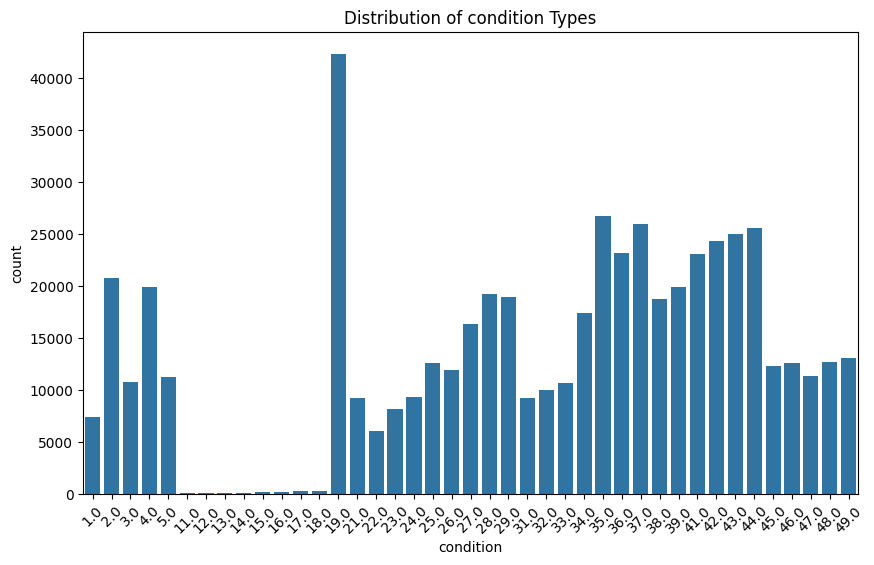

In [30]:
# Frequency Analysis
print(df_data['condition'].value_counts())

# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='condition', data=df_data)
plt.title('Distribution of condition Types')
plt.xticks(rotation=45)
plt.show()

In [31]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_make = df_data[df_data['condition'].isnull()][['condition','make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['transmission'])

# Buat Analisa lebih dalam, coba ganti sort_values dengan kolom lain seperti `transmission`

# Tampilkan baris dengan nilai Null di kolom 'make'
print("Baris dengan Nilai Null di Kolom 'condition':")
print(null_make)

Baris dengan Nilai Null di Kolom 'condition':
        condition        make        model                    trim  \
421289        NaN  Volkswagen        Jetta  SE PZEV w/Connectivity   
461612        NaN  Volkswagen        Jetta  SE PZEV w/Connectivity   
461597        NaN  Volkswagen        Jetta  SE PZEV w/Connectivity   
453794        NaN  Volkswagen        Jetta  SE PZEV w/Connectivity   
444501        NaN  Volkswagen        Jetta  SE PZEV w/Connectivity   
...           ...         ...          ...                     ...   
43477         NaN      Nissan        Rogue                       S   
43547         NaN      Toyota         RAV4                 Limited   
43564         NaN  Volkswagen           CC                   Sport   
182059        NaN        Ford        F-150                      XL   
541568        NaN   Chevrolet  Astro Cargo                    Base   

               body transmission                vin  
421289  Navitgation        Sedan          automatic  
46161

Data `condition` penting buat mendeterminasi Pertanyaan bisnis yang akan kita jawab, drop!

######Odometer
Terdapat Anomali Data, cek Row dan Cell Terkait

In [32]:
# Frequency Analysis
print(df_data['odometer'].value_counts())

odometer
1.0         1318
999999.0      72
10.0          29
21587.0       21
29137.0       18
            ... 
84791.0        1
184061.0       1
113144.0       1
201099.0       1
262065.0       1
Name: count, Length: 172278, dtype: int64


Value Counts untuk Rentang Odometer:
1-50: 1657
51 - 100: 98
101-1000: 825
1001-10000: 23204
10001-20000: 58422
>50000: 474537


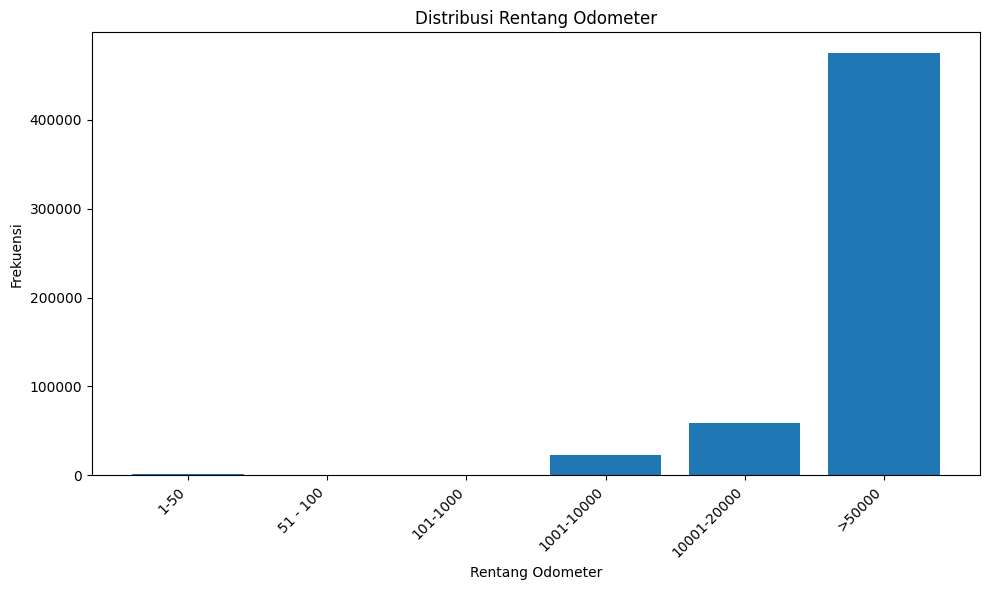

In [33]:
# Membuat bin untuk rentang odometer
bins = [1,50, 100, 1000, 10000, 20000, float('inf')]  # float('inf') untuk nilai > 50000
labels = ['1-50','51 - 100', '101-1000', '1001-10000', '10001-20000', '>50000']

# Menetapkan data ke bin dan menghitung kemunculan
df_data['odometer_range'] = pd.cut(df_data['odometer'], bins=bins, labels=labels, right=False)
odometer_counts = df_data['odometer_range'].value_counts().sort_index()

# Menampilkan value counts untuk setiap rentang odometer
print("Value Counts untuk Rentang Odometer:")
for range_label, count in odometer_counts.items():
    print(f"{range_label}: {count}")

# Membuat diagram batang
plt.figure(figsize=(10, 6))  # Menyesuaikan ukuran gambar sesuai kebutuhan
plt.bar(odometer_counts.index, odometer_counts.values)
plt.title('Distribusi Rentang Odometer')
plt.xlabel('Rentang Odometer')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x agar lebih mudah dibaca
plt.tight_layout()  # Menyesuaikan tata letak untuk mencegah label tumpang tindih
plt.show()

Dari sini kita bisa tarik **Kesimpulan** :
- Adanya [Outlier](https://www.google.com/search?q=what+is+outlier+in+data+analysis&sca_esv=540846efa2b16f65&rlz=1C1CHBF_enID1069ID1069&sxsrf=AHTn8zr_ltQBkMJwFZWXH7alcJrThZpVEA%3A1741367320023&ei=GCjLZ8qRAc-D4-EPsIPakQk&oq=What+is+Outlier+in+data&gs_lp=Egxnd3Mtd2l6LXNlcnAiF1doYXQgaXMgT3V0bGllciBpbiBkYXRhKgIIAjIGEAAYBxgeMgYQABgHGB4yCBAAGIAEGMsBMggQABiABBjLATIIEAAYgAQYywEyCBAAGIAEGMsBMggQABiABBjLATIIEAAYgAQYywEyBhAAGAoYHjIEEAAYHkjrMFC2BViGGnABeAGQAQCYAfMCoAGpEKoBBzAuMy4xLjS4AQPIAQD4AQGYAgmgAvwQwgIKEAAYsAMY1gQYR8ICDRAAGIAEGLADGEMYigXCAgYQABgWGB7CAggQABiABBiiBMICBRAAGO8FwgIHECEYoAEYCsICCRAAGIAEGBMYDcICChAAGBMYChgNGB7CAggQABgTGA0YHsICChAAGBMYFhgKGB7CAggQABgTGBYYHpgDAIgGAZAGCpIHBzEuMS4zLjSgB4Qu&sclient=gws-wiz-serp) yang nanti dapat mempengaruhi Value dari data yang tengah kita *Assess*

---
Matters to Discuss : Kenapa ada Outlier?

🗣️: Bang, kok ada Outlier? datanya Numerik semua kok..

🐱: Nah, kenapa dibilang ada outlier, karena ada data Anomali yaitu data dengan value 1 - 49, Seperti yang sudah kita lihat, kalo data yang kita gunakan itu data Penjualan **Mobil Bekas**, Ditambah karena adanya Data pada kolom `condition` yang mempunyai range 1 - 50, menambah kemungkinan data ini itu termasuk outlier (Kemungkinan Data Entry yang Jelek, Human Error, dll.)

🗣️: Jadi datanya mau diapain bang?

🐱: Ada beberapa metode yang ada, tapi final decisionnya ada ditangan kalian as a Data Analyst, jadi konsiderasinya itu
- Datanya drop aja, ribet
- Datanya dianggap normal dan ngga perlu dimodifikasi, karena pasti ada kasus mobil baru yang langsung dijual karena berbagai alasan

Kalo mau cek terkait penilaian "Kebekasan" sebuah Mobil dari faktor Odometernya, [Klik aja Link ini](https://www.auksi.co.id/detail-artikel/berapa-kilometer-mobil-bekas-yang-normal-cek-informasinya-di-sini)

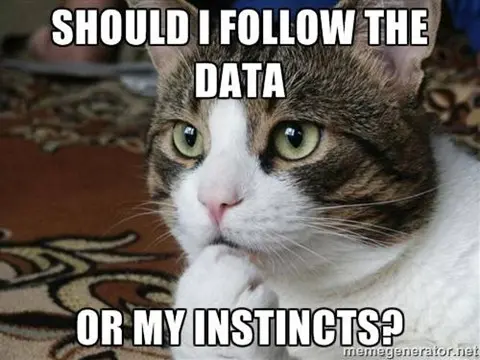

######Color
Terdapat Anomali Data, cek Row dan Cell Terkait

In [34]:
# Frequency Analysis
print(df_data['color'].value_counts())

color
black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
—             24685
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
9562              1
2846              1
18561             1
18384             1
5705              1
2817              1
6158              1
721               1
20627             1
20379             1
9837              1
9887              1
2172              1
339               1
6864              1
2711              1
11034             1
16633             1
6388              1
15719             1
12655             1
14872             1
1167              1
9410              1
4802              1
5001              1
Name: count, dtype: int64


Dari sini kita bisa tarik **Kesimpulan** :
- Adanya [Outlier](https://www.google.com/search?q=what+is+outlier+in+data+analysis&sca_esv=540846efa2b16f65&rlz=1C1CHBF_enID1069ID1069&sxsrf=AHTn8zr_ltQBkMJwFZWXH7alcJrThZpVEA%3A1741367320023&ei=GCjLZ8qRAc-D4-EPsIPakQk&oq=What+is+Outlier+in+data&gs_lp=Egxnd3Mtd2l6LXNlcnAiF1doYXQgaXMgT3V0bGllciBpbiBkYXRhKgIIAjIGEAAYBxgeMgYQABgHGB4yCBAAGIAEGMsBMggQABiABBjLATIIEAAYgAQYywEyCBAAGIAEGMsBMggQABiABBjLATIIEAAYgAQYywEyBhAAGAoYHjIEEAAYHkjrMFC2BViGGnABeAGQAQCYAfMCoAGpEKoBBzAuMy4xLjS4AQPIAQD4AQGYAgmgAvwQwgIKEAAYsAMY1gQYR8ICDRAAGIAEGLADGEMYigXCAgYQABgWGB7CAggQABiABBiiBMICBRAAGO8FwgIHECEYoAEYCsICCRAAGIAEGBMYDcICChAAGBMYChgNGB7CAggQABgTGA0YHsICChAAGBMYFhgKGB7CAggQABgTGBYYHpgDAIgGAZAGCpIHBzEuMS4zLjSgB4Qu&sclient=gws-wiz-serp) yang nanti dapat mempengaruhi Value dari data yang tengah kita *Assess*

*PS : Kita Drop aja karena datanya sedikit*

######Interior
Data Normal, Untuk Null dan data dengan value `-` kita bakal ganti dengan Value  'Unknown'

interior
black        244329
gray         178581
beige         59758
tan           44093
—             17077
brown          8640
red            1363
blue           1143
silver         1104
off-white       480
purple          339
gold            324
white           256
green           245
burgundy        191
orange          145
yellow           20
Name: count, dtype: int64


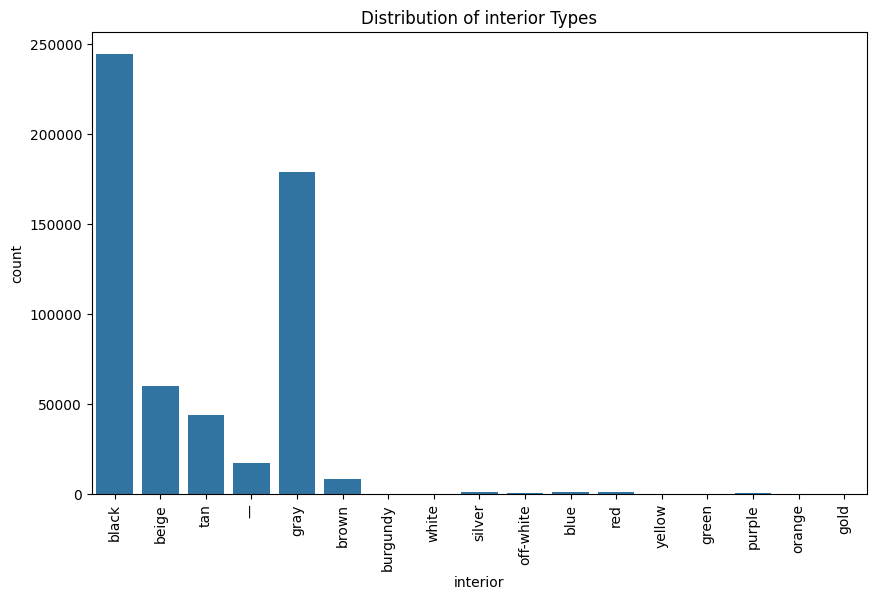

In [35]:
# Frequency Analysis
print(df_data['interior'].value_counts())

# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='interior', data=df_data)
plt.title('Distribution of interior Types')
plt.xticks(rotation=90)
plt.show()

######Seller
Data Normal, Buat Null kita buat datanya diisi oleh 'Unknown' sajaa

In [36]:
# Frequency Analysis
print(df_data['seller'].value_counts())

seller
nissan-infiniti lt               19693
ford motor credit company llc    19162
the hertz corporation            18299
santander consumer               15285
avis corporation                 12540
                                 ...  
whitney motor company                1
auto max sales inc                   1
lscg fund 19 llc                     1
lexus of santa fe                    1
i -5 uhlmann rv                      1
Name: count, Length: 14263, dtype: int64


######MMR
Terdapat Anomali Data, cek Null dan Row terkait

In [37]:
# Frequency Analysis
print(df_data['mmr'].value_counts())

mmr
12500.0     1761
11600.0     1751
11650.0     1746
12150.0     1722
11850.0     1717
            ... 
172000.0       1
134000.0       1
113000.0       1
154000.0       1
164000.0       1
Name: count, Length: 1101, dtype: int64


In [38]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_make = df_data[df_data['mmr'].isnull()][['mmr','condition','make','transmission', 'vin']].sort_values(by=['make'])

# Buat Analisa lebih dalam, coba ganti sort_values dengan kolom lain seperti `transmission`

# Tampilkan baris dengan nilai Null di kolom 'make'
print("Baris dengan Nilai Null di Kolom 'mmr':")
print(null_make)

Baris dengan Nilai Null di Kolom 'mmr':
        mmr  condition        make transmission                vin
406524  NaN       27.0    Chrysler    automatic  2c3ccaag9dh723146
429644  NaN       25.0    Chrysler    automatic  1c3ccbbb9dn718531
429660  NaN       34.0       Dodge    automatic  1c3cdzcg5dn741076
457803  NaN       19.0       Dodge    automatic  2c3cdxbg6dh688757
522495  NaN       26.0        Ford    automatic  3fahp0jg5cr241590
457035  NaN       19.0     Hyundai    automatic  5npdh4ae3eh504144
429786  NaN        3.0     Hyundai    automatic  kmhct4ae7du450468
306447  NaN       19.0     Hyundai    automatic  5npeb4ac6dh687932
422358  NaN       28.0     Hyundai          NaN  5npeb4ac3dh735368
543129  NaN       19.0     Hyundai    automatic  kmhct4ae0eu650738
431905  NaN       19.0         Kia    automatic  kndjt2a5xd7765280
537706  NaN       25.0         Kia    automatic  knaft4a22c5559983
529009  NaN        NaN  Volkswagen        sedan                NaN
529622  NaN        NaN

MMR Sebenarnya bisa dihitung dari data yang kita punya, but the problem is we dont have the formula, So we'll drop it anyway

Value Counts untuk Rentang mmr:
1-50: 30
51 - 100: 67
101-1000: 10084
1001-10000: 197390
>10000: 351228


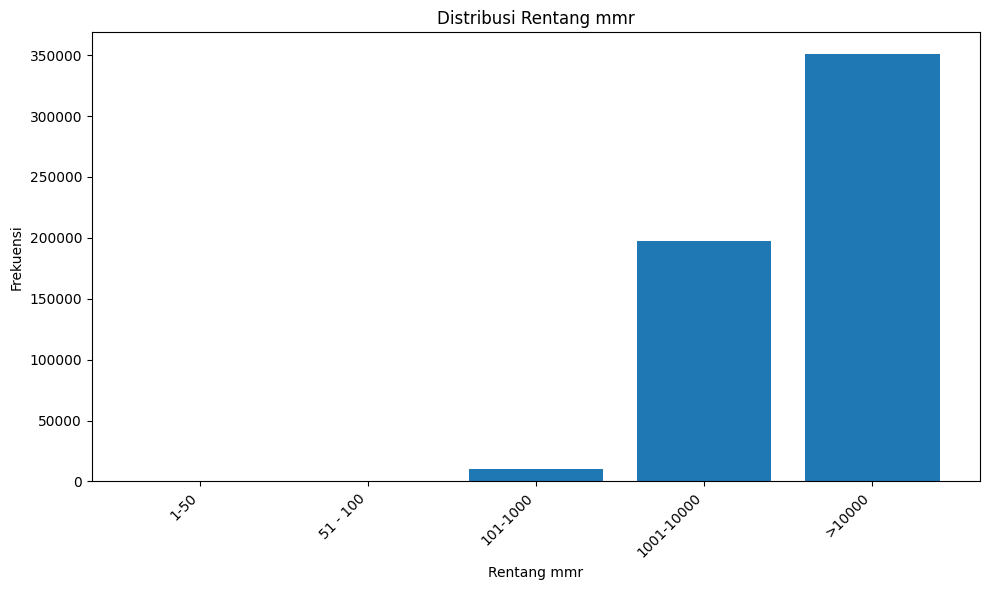

In [39]:
# Membuat bin untuk rentang mmr
bins = [1,50, 100, 1000, 10000, float('inf')]  # float('inf') untuk nilai > 50000
labels = ['1-50','51 - 100', '101-1000', '1001-10000', '>10000']

# Menetapkan data ke bin dan menghitung kemunculan
df_data['mmr_range'] = pd.cut(df_data['mmr'], bins=bins, labels=labels, right=False)
mmr_counts = df_data['mmr_range'].value_counts().sort_index()

# Menampilkan value counts untuk setiap rentang mmr
print("Value Counts untuk Rentang mmr:")
for range_label, count in mmr_counts.items():
    print(f"{range_label}: {count}")

# Membuat diagram batang
plt.figure(figsize=(10, 6))  # Menyesuaikan ukuran gambar sesuai kebutuhan
plt.bar(mmr_counts.index, mmr_counts.values)
plt.title('Distribusi Rentang mmr')
plt.xlabel('Rentang mmr')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x agar lebih mudah dibaca
plt.tight_layout()  # Menyesuaikan tata letak untuk mencegah label tumpang tindih
plt.show()

MMR 1 - 100 Kita drop aja ygy

######Selling Price
Data Normal, Drop Null saja~

In [40]:
# Frequency Analysis
print(df_data['sellingprice'].value_counts())

sellingprice
11000.0     4453
12000.0     4450
13000.0     4334
10000.0     4029
14000.0     3899
            ... 
28350.0        1
30201.0        1
131500.0       1
31550.0        1
27840.0        1
Name: count, Length: 1887, dtype: int64


In [41]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_make = df_data[df_data['sellingprice'].isnull()][['sellingprice','condition','make','transmission', 'vin']].sort_values(by=['make'])

# Buat Analisa lebih dalam, coba ganti sort_values dengan kolom lain seperti `transmission`

# Tampilkan baris dengan nilai Null di kolom 'make'
print("Baris dengan Nilai Null di Kolom 'sellingprice':")
print(null_make)

Baris dengan Nilai Null di Kolom 'sellingprice':
        sellingprice  condition      make transmission                vin
406524           NaN       27.0  Chrysler    automatic  2c3ccaag9dh723146
429644           NaN       25.0  Chrysler    automatic  1c3ccbbb9dn718531
429660           NaN       34.0     Dodge    automatic  1c3cdzcg5dn741076
457803           NaN       19.0     Dodge    automatic  2c3cdxbg6dh688757
522495           NaN       26.0      Ford    automatic  3fahp0jg5cr241590
306447           NaN       19.0   Hyundai    automatic  5npeb4ac6dh687932
422358           NaN       28.0   Hyundai          NaN  5npeb4ac3dh735368
429786           NaN        3.0   Hyundai    automatic  kmhct4ae7du450468
457035           NaN       19.0   Hyundai    automatic  5npdh4ae3eh504144
543129           NaN       19.0   Hyundai    automatic  kmhct4ae0eu650738
431905           NaN       19.0       Kia    automatic  kndjt2a5xd7765280
537706           NaN       25.0       Kia    automatic  knaft4a

Just drop the Selling Price, data yang berkaitan juga sedikit

Value Counts untuk Rentang sellingprice:
1-50: 4
51 - 100: 0
101-1000: 15808
1001-10000: 196446
>10000: 346567


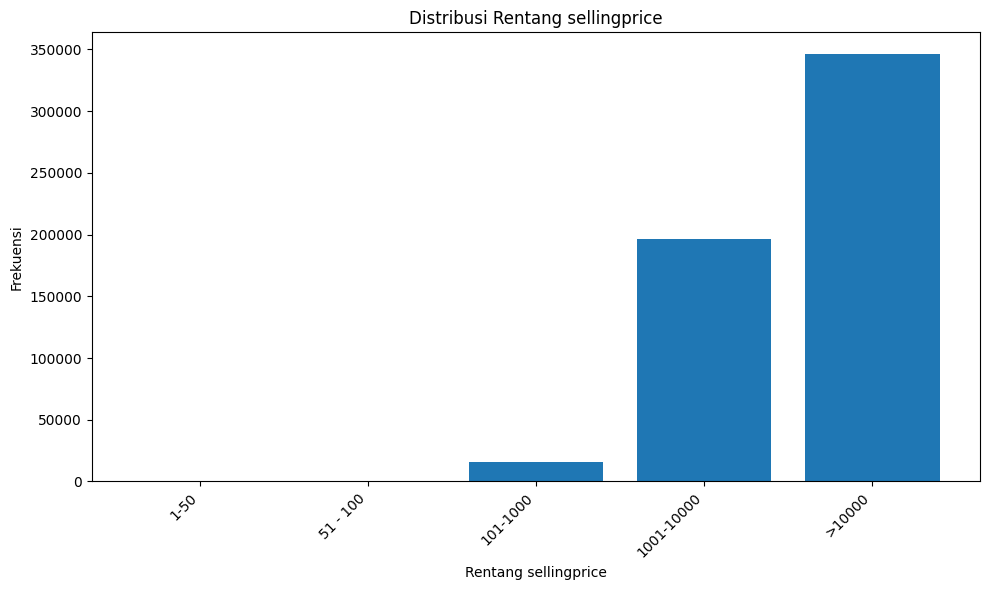

In [42]:
# Membuat bin untuk rentang sellingprice
bins = [1,50, 100, 1000, 10000, float('inf')]  # float('inf') untuk nilai > 50000
labels = ['1-50','51 - 100', '101-1000', '1001-10000', '>10000']

# Menetapkan data ke bin dan menghitung kemunculan
df_data['sellingprice_range'] = pd.cut(df_data['sellingprice'], bins=bins, labels=labels, right=False)
sellingprice_counts = df_data['sellingprice_range'].value_counts().sort_index()

# Menampilkan value counts untuk setiap rentang sellingprice
print("Value Counts untuk Rentang sellingprice:")
for range_label, count in sellingprice_counts.items():
    print(f"{range_label}: {count}")

# Membuat diagram batang
plt.figure(figsize=(10, 6))  # Menyesuaikan ukuran gambar sesuai kebutuhan
plt.bar(sellingprice_counts.index, sellingprice_counts.values)
plt.title('Distribusi Rentang sellingprice')
plt.xlabel('Rentang sellingprice')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x agar lebih mudah dibaca
plt.tight_layout()  # Menyesuaikan tata letak untuk mencegah label tumpang tindih
plt.show()

Data di range 1 - 50 kita Drop disini

######Date
Data Normal, Drop Null dan Ganti tipe Data

In [43]:
# Frequency Analysis
print(df_data['saledate'].value_counts())

saledate
Tue Feb 10 2015 01:30:00 GMT-0800 (PST)    5334
Tue Feb 17 2015 01:30:00 GMT-0800 (PST)    5016
Tue Jan 27 2015 01:30:00 GMT-0800 (PST)    4902
Tue Jan 20 2015 01:30:00 GMT-0800 (PST)    4731
Tue Mar 03 2015 01:30:00 GMT-0800 (PST)    4653
                                           ... 
Thu Feb 05 2015 05:10:00 GMT-0800 (PST)       1
Thu Jan 02 2014 09:30:00 GMT-0800 (PST)       1
Tue Apr 28 2015 05:50:00 GMT-0700 (PDT)       1
Wed Jan 21 2015 05:45:00 GMT-0800 (PST)       1
Wed Jul 08 2015 09:45:00 GMT-0700 (PDT)       1
Name: count, Length: 3766, dtype: int64


In [44]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_make = df_data[df_data['saledate'].isnull()][['saledate','condition','make','transmission', 'vin']].sort_values(by=['make'])

# Buat Analisa lebih dalam, coba ganti sort_values dengan kolom lain seperti `transmission`

# Tampilkan baris dengan nilai Null di kolom 'make'
print("Baris dengan Nilai Null di Kolom 'saledate':")
print(null_make)

Baris dengan Nilai Null di Kolom 'saledate':
       saledate  condition      make transmission                vin
406524      NaN       27.0  Chrysler    automatic  2c3ccaag9dh723146
429644      NaN       25.0  Chrysler    automatic  1c3ccbbb9dn718531
429660      NaN       34.0     Dodge    automatic  1c3cdzcg5dn741076
457803      NaN       19.0     Dodge    automatic  2c3cdxbg6dh688757
522495      NaN       26.0      Ford    automatic  3fahp0jg5cr241590
306447      NaN       19.0   Hyundai    automatic  5npeb4ac6dh687932
422358      NaN       28.0   Hyundai          NaN  5npeb4ac3dh735368
429786      NaN        3.0   Hyundai    automatic  kmhct4ae7du450468
457035      NaN       19.0   Hyundai    automatic  5npdh4ae3eh504144
543129      NaN       19.0   Hyundai    automatic  kmhct4ae0eu650738
431905      NaN       19.0       Kia    automatic  kndjt2a5xd7765280
537706      NaN       25.0       Kia    automatic  knaft4a22c5559983


Just drop the Selling Date, data yang berkaitan juga sedikit

### Data Cleaning

Nah dari data yang udah kita assess, kita nemuin banyak banget Anomali Data dan *Uncleaned Data*

Di section ini, we will focusing on Cleaninf the Dataset!

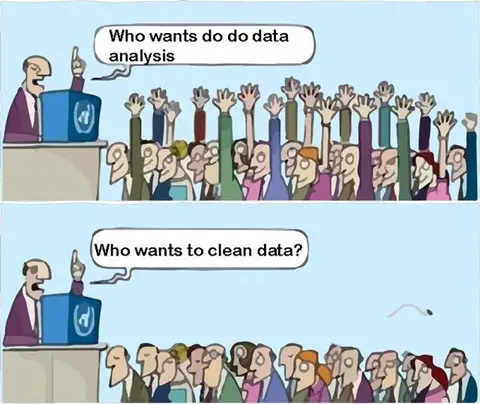

#### Year Data Column
- **Action :** Since no duplication or null values were found, no further cleaning is needed for this dataset.

#### Car Maker Data Row
- **Issues :** *Data Null*.
- **Action :** **Dropping the Data**.

In [45]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_make = df_data[df_data['make'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['model'])

# Buat Analisa lebih dalam, coba ganti sort_values dengan kolom lain seperti `trim` atau `body`
# null_make = df_data[df_data['make'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['trim'])
# null_make = df_data[df_data['make'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['body'])

# Tampilkan baris dengan nilai Null di kolom 'make'
print("Baris dengan Nilai Null di Kolom 'make':")
print(null_make)

Baris dengan Nilai Null di Kolom 'make':
       make model trim body transmission                vin
742     NaN   NaN  NaN  NaN    automatic  wbakb8c51cc964387
747     NaN   NaN  NaN  NaN    automatic  wbakb8c53cc964410
766     NaN   NaN  NaN  NaN    automatic  wbakb8c54cc964089
798     NaN   NaN  NaN  NaN    automatic  wbakb8c59cc448049
803     NaN   NaN  NaN  NaN    automatic  wbakb8c58cc962863
...     ...   ...  ...  ...          ...                ...
558545  NaN   NaN  NaN  NaN    automatic  4n2xn11txyd844711
558617  NaN   NaN  NaN  NaN    automatic  jtjbt20x770129305
558736  NaN   NaN  NaN  NaN    automatic  4a4jn2as6be029938
558773  NaN   NaN  NaN  NaN    automatic  1g1yy24u355116011
558776  NaN   NaN  NaN  NaN    automatic  zam39nka2d0068288

[10301 rows x 6 columns]


Mari Kita drop

In [46]:
# Assuming your DataFrame is called 'df'
df_data = df_data.dropna(subset=['make'])

In [47]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_make = df_data[df_data['make'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['model'])

# Buat Analisa lebih dalam, coba ganti sort_values dengan kolom lain seperti `trim` atau `body`
# null_make = df_data[df_data['make'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['trim'])
# null_make = df_data[df_data['make'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['body'])

# Tampilkan baris dengan nilai Null di kolom 'make'
print("Baris dengan Nilai Null di Kolom 'make':")
print(null_make)

Baris dengan Nilai Null di Kolom 'make':
Empty DataFrame
Columns: [make, model, trim, body, transmission, vin]
Index: []


#### Model Data Row
- **Issues** : Data Null.
- **Action** : Dropping and Modify the Data.

In [48]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_make = df_data[df_data['model'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['make'])

# Buat Analisa lebih dalam, coba ganti sort_values dengan kolom lain seperti `trim` atau `body`
# null_make = df_data[df_data['model'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['trim'])
# null_make = df_data[df_data['model'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['body'])

# Tampilkan baris dengan nilai Null di kolom 'make'
print("Baris dengan Nilai Null di Kolom 'model':")
print(null_make)

Baris dengan Nilai Null di Kolom 'model':
        make model                      trim   body transmission  \
553665  Audi   NaN  2.0 TFSI Premium quattro  sedan    automatic   
552124  Audi   NaN  2.0 TFSI Premium quattro  sedan    automatic   
410045  Audi   NaN  2.0 TFSI Premium quattro  Sedan          NaN   
70510   Audi   NaN  2.0 TFSI Premium quattro  Sedan          NaN   
351561  Audi   NaN  2.0 TFSI Premium quattro  Sedan    automatic   
...      ...   ...                       ...    ...          ...   
188756   BMW   NaN              750Li xDrive  Sedan    automatic   
188752   BMW   NaN              750Li xDrive  Sedan    automatic   
108007   BMW   NaN               750i xDrive  Sedan    automatic   
188849   BMW   NaN              750Li xDrive  Sedan    automatic   
273152   BMW   NaN              750Li xDrive  Sedan    automatic   

                      vin  
553665  waubfgff0f1043524  
552124  waubfgffxf1005315  
410045  waubfgffxf1002043  
70510   waubfgff7f1009810  
3

Wadidaw, Udah banyak yang dibersihin ya dari Data Row `Maker`

Coba kita liat dulu deh, apakah ada data lain yang bisa bantu buat isi datanya

In [49]:
# Create a list of target values
target_values = [
    ('Audi', '2.0 TFSI Premium quattro', 'sedan'),
    ('Audi', '2.0 TFSI Premium quattro', 'Sedan'),
    ('BMW', '750Li', 'Sedan'),
    ('BMW', '750i', 'Sedan'),
    ('BMW', '650Li', 'Sedan'),
    ('BMW', '650i', 'Sedan'),
]

# Create a boolean mask to identify matching rows
mask = df_data.apply(lambda row: tuple(row[['make', 'trim', 'body']]) in target_values, axis=1)

# Filter the DataFrame using the mask
filtered_df_data = df_data[mask]

In [50]:
display(filtered_df_data)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,odometer_range,mmr_range,sellingprice_range
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),1001-10000,>10000,>10000
52,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c51ed129563,ca,42.0,7305.0,white,black,the hertz corporation,65000.0,66100.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST),1001-10000,>10000,>10000
72,2014,BMW,NaN,750Li,Sedan,automatic,wbaye8c59ed134514,ca,43.0,12172.0,black,black,financial services remarketing (lease),67000.0,66000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),10001-20000,>10000,>10000
77,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c53ed128866,ca,29.0,37752.0,white,black,financial services remarketing (lease),62000.0,58000.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),>50000,>10000,>10000
2519,2010,BMW,7 Series,750Li,Sedan,automatic,wbakb8c58acy63859,ca,37.0,64010.0,beige,beige,caseys cars inc,28400.0,28500.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),>50000,>10000,>10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485076,2015,BMW,NaN,750i,Sedan,automatic,wbaya8c5xfd825595,nj,49.0,6516.0,gray,black,bmw north america greer,72000.0,71500.0,Tue Jun 02 2015 07:00:00 GMT-0700 (PDT),1001-10000,>10000,>10000
520716,2015,Audi,NaN,2.0 TFSI Premium quattro,sedan,automatic,waubfgff6f1002038,ca,5.0,7652.0,white,black,vw credit,26400.0,25000.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT),1001-10000,>10000,>10000
520731,2015,Audi,NaN,2.0 TFSI Premium quattro,sedan,NaN,waubfgff1f1002738,pa,45.0,5271.0,black,black,autohaus lancaster inc,26800.0,26750.0,Thu Jun 11 2015 02:00:00 GMT-0700 (PDT),1001-10000,>10000,>10000
552124,2015,Audi,NaN,2.0 TFSI Premium quattro,sedan,automatic,waubfgffxf1005315,tx,35.0,4529.0,gray,black,tdaf remarketing,26500.0,27000.0,Wed Jun 17 2015 03:15:00 GMT-0700 (PDT),1001-10000,>10000,>10000


Oke kita, nemuin kalo Data BMW bisa diisi dengan data yang sudah ada, dan bisa kita Modifikasikan

Sedangkan untuk Audi, kita ngga bisa Nemuin model yang mungkin berkaitan, maka dari itu untuk BMW bakal kita Modif, untuk Audi Kita drop ygy

**Drop Audi**

In [51]:
# Create a list of values to drop
values_to_drop = [
    ('Audi', '2.0 TFSI Premium quattro', 'sedan'),
    ('Audi', '2.0 TFSI Premium quattro', 'Sedan'),
]

# Drop rows matching the values, modifying df_data in-place
df_data.drop(
    df_data[df_data.apply(lambda row: tuple(row[['make', 'trim', 'body']]) in values_to_drop, axis=1)].index,
    inplace=True
)

**Modify BMW**

In [52]:
# Define conditions and corresponding model values
conditions = [
    (df_data['make'] == 'BMW') & (df_data['trim'] == '750Li xDrive') & (df_data['body'] == 'Sedan'),
    (df_data['make'] == 'BMW') & (df_data['trim'] == '750i xDrive') & (df_data['body'] == 'Sedan'),
    (df_data['make'] == 'BMW') & (df_data['trim'] == '650Li xDrive') & (df_data['body'] == 'Sedan'),
    (df_data['make'] == 'BMW') & (df_data['trim'] == '650i xDrive') & (df_data['body'] == 'Sedan'),
    (df_data['make'] == 'BMW') & (df_data['trim'] == '750Li xDrive') & (df_data['body'] == 'sedan'),
    (df_data['make'] == 'BMW') & (df_data['trim'] == '750i xDrive') & (df_data['body'] == 'sedan'),
    (df_data['make'] == 'BMW') & (df_data['trim'] == '650Li xDrive') & (df_data['body'] == 'sedan'),
    (df_data['make'] == 'BMW') & (df_data['trim'] == '650i xDrive') & (df_data['body'] == 'sedan'),
    (df_data['make'] == 'BMW') & (df_data['trim'] == '750Li') & (df_data['body'] == 'sedan'),
    (df_data['make'] == 'BMW') & (df_data['trim'] == '750i') & (df_data['body'] == 'sedan'),
]
model_values = [
    '7 Series',
    '7 Series',
    '6 Series',
    '6 Series Gran Coupe',
    '7 Series',
    '7 Series',
    '6 Series',
    '6 Series Gran Coupe',
    '7 Series',
    '7 Series',
]

# Use np.select to assign model values based on conditions
df_data['model'] = np.select(conditions, model_values, default=df_data['model'])

Oke let's recheck

In [53]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_make = df_data[df_data['model'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['make'])

# Tampilkan baris dengan nilai Null di kolom 'make'
print("Baris dengan Nilai Null di Kolom 'model':")
print(null_make)

Baris dengan Nilai Null di Kolom 'model':
       make model   trim   body transmission                vin
72      BMW   NaN  750Li  Sedan    automatic  wbaye8c59ed134514
31262   BMW   NaN   750i  Sedan    automatic  wbaya8c52ed825069
61956   BMW   NaN   750i  Sedan    automatic  wbaya8c55ed228269
102668  BMW   NaN  750Li  Sedan    automatic  wbaye8c53ed134945
107954  BMW   NaN  750Li  Sedan    automatic  wbaye8c55ed780701
188812  BMW   NaN  750Li  Sedan    automatic  wbaye8c51ed135298
239346  BMW   NaN  750Li  Sedan    automatic  wbaye8c5xed135087
273139  BMW   NaN   750i  Sedan    automatic  wbaya8c58ed825142
273149  BMW   NaN  750Li  Sedan    automatic  wbaye8c53ed136453
325805  BMW   NaN  750Li  Sedan    automatic  wbaye8c58ed135282
408384  BMW   NaN  750Li  Sedan    automatic  wbaye8c58eds16086
454115  BMW   NaN  750Li  Sedan    automatic  wbaye8c50ed135891
485076  BMW   NaN   750i  Sedan    automatic  wbaya8c5xfd825595


Naisu, let's proceed

#### Trim Data Row
- **Issues** : Data Null.
- **Action** : Dropping and Modify the Data.

In [54]:
# Filter untuk nilai Null di kolom 'trim' dan pilih kolom yang diinginkan
null_make = df_data[df_data['trim'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['make'])

# Tampilkan baris dengan nilai Null di kolom 'trim'
print("Baris dengan Nilai Null di Kolom 'trim':")
display(null_make)

Baris dengan Nilai Null di Kolom 'trim':


,make,model,trim,body,transmission,vin
556917,Chevrolet,malibu,NaN,NaN,automatic,1g1zb5eb9af220611
550571,Chevrolet,malibu,NaN,NaN,automatic,1g1zb5eb4af307705
501496,Chevrolet,malibu,NaN,NaN,automatic,1g1zb5eb9af226019
505288,Chevrolet,malibu,NaN,NaN,automatic,1g1zb5eb5af203787
509803,Chevrolet,malibu,NaN,NaN,automatic,1g1zb5eb3af222872
...,...,...,...,...,...,...
116825,toyota,matrix,NaN,NaN,manual,2t1kr32e57c657367
46547,toyota,yaris,NaN,NaN,NaN,jtdkt923775038818
71046,volkswagen,beetle,NaN,NaN,NaN,3vwrw2ag6am019533
94534,volkswagen,eurovan,NaN,NaN,automatic,wv2kb47033h010979


Mari kita cari dengan dataset yang berkaitan

In [55]:
# Create a list of target values
target_values = [
    ('Chevrolet', 'malibu'),
    ('Chevrolet', 'Malibu'),
    ('Honda', 'accord'),
    ('Honda', 'Accord'),
    ('acura', 'rl'),
    ('acura', 'Rl'),
]

# Create a boolean mask to identify matching rows
mask = df_data.apply(lambda row: tuple(row[['make', 'model']]) in target_values, axis=1)

# Filter the DataFrame using the mask
filtered_df_data = df_data[mask]

In [56]:
display(filtered_df_data)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,odometer_range,mmr_range,sellingprice_range
56,2015,Chevrolet,Malibu,LT,Sedan,automatic,1g11d5sl6fu106427,ca,1.0,6105.0,silver,black,enterprise vehicle exchange / tra / rental / t...,16600.0,9800.0,Wed Jan 14 2015 07:05:00 GMT-0800 (PST),1001-10000,>10000,1001-10000
952,2012,Chevrolet,Malibu,LS Fleet,Sedan,automatic,1g1za5e0xcf381988,ca,29.0,67196.0,black,gray,the hertz corporation,8425.0,9300.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),>50000,1001-10000,1001-10000
989,2012,Chevrolet,Malibu,LS Fleet,Sedan,automatic,1g1za5e04cf380576,ca,4.0,58781.0,white,gray,the hertz corporation/gm,8925.0,10000.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),>50000,1001-10000,>10000
1006,2012,Chevrolet,Malibu,LT,Sedan,automatic,1g1zd5e01cf385922,ca,38.0,67321.0,silver,black,the hertz corporation/gm,9400.0,9300.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),>50000,1001-10000,1001-10000
1034,2012,Chevrolet,Malibu,LT,Sedan,automatic,1g1zc5e03cf277854,ca,44.0,72362.0,silver,gray,fleet street remarketing llc,8850.0,8800.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),>50000,1001-10000,1001-10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558449,2004,Chevrolet,Malibu,Base,sedan,automatic,1g1zs52f84f228260,ma,28.0,90899.0,gold,tan,boch toyota/scion south,3575.0,2300.0,Thu Jun 18 2015 11:30:00 GMT-0700 (PDT),>50000,1001-10000,1001-10000
558487,2014,Honda,Accord,LX,sedan,automatic,1hgcr2f38ea012223,pa,48.0,10561.0,gray,black,r hollenshead auto sales inc,17450.0,17100.0,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT),10001-20000,>10000,>10000
558489,2014,Honda,Accord,EX-L,sedan,automatic,1hgcr2f89ea142104,pa,37.0,21940.0,beige,tan,capa wholesale cars inc,20900.0,20100.0,Fri Jun 19 2015 02:15:00 GMT-0700 (PDT),>50000,>10000,>10000
558595,2009,Honda,Accord,EX-L V-6,sedan,automatic,1hgcp36899a042604,pa,41.0,125686.0,—,beige,r hollenshead auto sales inc,8400.0,7900.0,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT),>50000,1001-10000,1001-10000


Wah ada nih, tapi karena tipenya yang berbeda beda, kita bakalan drop aja si data ini

*PS : Kita gabisa nentuin si mobil ini pake trim apa berbasis dari pengetahuan kita terhadap `make` dan `model` nya, karena data supportnya setelah kita lihat punya versi yang berbeda beda*

In [57]:
# Assuming your DataFrame is called 'df'
df_data = df_data.dropna(subset=['trim'])

In [58]:
# Filter untuk nilai Null di kolom 'trim' dan pilih kolom yang diinginkan
null_make = df_data[df_data['trim'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['make'])

# Tampilkan baris dengan nilai Null di kolom 'trim'
print("Baris dengan Nilai Null di Kolom 'trim':")
display(null_make)

Baris dengan Nilai Null di Kolom 'trim':


,make,model,trim,body,transmission,vin


Let's Proceed mate!

#### Body Data Row
- **Issues** : Data Null.
- **Action** : Dropping and Modify the Data.

In [59]:
# Filter untuk nilai Null di kolom 'model' dan pastikan 'make', 'trim', dan 'body' memiliki nilai
filtered_model = df_data[df_data['body'].isnull() & df_data['make'].notnull() & df_data['model'].notnull() & df_data['trim'].notnull()]

# Tampilkan baris yang difilter
print("Baris dengan Nilai Null di Kolom 'model' tetapi 'make', 'trim', dan 'body' memiliki nilai:")
display(filtered_model[['make', 'model', 'trim', 'body']])

Baris dengan Nilai Null di Kolom 'model' tetapi 'make', 'trim', dan 'body' memiliki nilai:


,make,model,trim,body
468,lincoln,mkt,awd v6,NaN
743,bmw,750i,xdr 750i xdriv,NaN
770,bmw,750li,750li,NaN
793,bmw,750i,750i,NaN
794,bmw,750li,750li,NaN
...,...,...,...,...
143161,ford,expeditn,el 4x4 limited,NaN
143419,cadillac,srx,awd v6 awd,NaN
145012,kia,borrego,lx,NaN
145861,ford,explorer,4x4 v6 xlt,NaN


Mari kita cari data yang persis ygy, biar galama kita coba ambil 5 sample aja, Disini aku ngambil
- Lincoln
- BMW
- Cadillac
- Ford
- KIA

In [60]:
# Create a list of target values
target_values = [
    ('lincoln', 'mkt'),
    ('Lincoln', 'mkt'),
    ('Lincoln', 'MKT'),
    ('Lincoln', 'Mkt'),
    ('bmw', '750i'),
    ('bmw', '750li'),
    ('BMW', '750i'),
    ('BMW', '750Li'),
    ('Cadillac', 'srx'),
    ('Ford', 'explorer'),
    ('Ford', 'expeditn'),
    ('KIA', 'borrego'),
]

# Create a boolean mask to identify matching rows
mask = df_data.apply(lambda row: tuple(row[['make', 'model']]) in target_values, axis=1)

# Filter the DataFrame using the mask
filtered_df_data = df_data[mask]

In [61]:
display(filtered_df_data)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,odometer_range,mmr_range,sellingprice_range
468,2013,lincoln,mkt,awd v6,NaN,automatic,2lmhj5nk1dbl52290,ca,41.0,74874.0,black,black,remarketing by ge/manheim southern california,19300.0,17750.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),>50000,>10000,>10000
743,2012,bmw,750i,xdr 750i xdriv,NaN,automatic,wbakc6c5xcc395623,ca,4.0,50790.0,gray,black,financial services remarketing (lease),33900.0,33500.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),>50000,>10000,>10000
770,2012,bmw,750li,750li,NaN,automatic,wbakb8c50cc963182,ca,37.0,31762.0,black,black,financial services remarketing (lease),45000.0,45000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),>50000,>10000,>10000
793,2012,bmw,750i,750i,NaN,automatic,wbaka8c54ccy37992,ca,49.0,53016.0,white,gray,financial services remarketing (lease),31300.0,34250.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),>50000,>10000,>10000
794,2012,bmw,750li,750li,NaN,automatic,wbakb8c56cc963431,ca,34.0,24739.0,white,gray,financial services remarketing (lease),47000.0,46750.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),>50000,>10000,>10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523653,2012,Lincoln,MKT,Base,wagon,NaN,2lmhj5at6cbl53805,pa,36.0,70530.0,black,black,morris auto enterprises llc,20300.0,20000.0,Fri Jun 12 2015 02:00:00 GMT-0700 (PDT),>50000,>10000,>10000
539630,2010,Lincoln,MKT,Base,wagon,automatic,2lmhj5at4abj20535,ma,34.0,97447.0,gray,black,bmw of cape cod,12050.0,13600.0,Tue Jun 16 2015 02:30:00 GMT-0700 (PDT),>50000,>10000,>10000
546281,2010,Lincoln,MKT,Base,wagon,automatic,2lmhj5fr6abj20727,fl,33.0,75179.0,silver,gray,nimnicht gmc,15800.0,13700.0,Tue Jun 16 2015 02:10:00 GMT-0700 (PDT),>50000,>10000,>10000
555779,2011,Lincoln,MKT,Base,wagon,automatic,2lmhj5fr7bbj50014,pa,41.0,26558.0,black,black,r hollenshead auto sales inc,22900.0,22800.0,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT),>50000,>10000,>10000


Ternyata ada data supportivenya guys, by average, Body memiliki value `Sedan`, jadi kita bakalan ngisi value terkait dengan `Sedan`!

Kita juga bakal modifikasi `sedan` jadi `Sedan` ya guyss

In [62]:
# Change all null values in 'body' to "Sedan"
df_data['body'] = df_data['body'].fillna('Sedan')

# Change all 'body' values that have "sedan" to "Sedan"
df_data['body'] = df_data['body'].str.replace('sedan', 'Sedan', case=False)

In [63]:
# Filter untuk nilai Null di kolom 'model' dan pastikan 'make', 'trim', dan 'body' memiliki nilai
filtered_model = df_data[df_data['body'].isnull() & df_data['make'].notnull() & df_data['model'].notnull() & df_data['trim'].notnull()]

# Tampilkan baris yang difilter
print("Baris dengan Nilai Null di Kolom 'model' tetapi 'make', 'trim', dan 'body' memiliki nilai:")
display(filtered_model[['make', 'model', 'trim', 'body']])

Baris dengan Nilai Null di Kolom 'model' tetapi 'make', 'trim', dan 'body' memiliki nilai:


,make,model,trim,body


#### Transmission Data Row
- **Issues** : Data Null.
- **Action** : Dropping and Modify the Data.

transmission
automatic    467655
manual        16940
sedan            15
Sedan            11
Name: count, dtype: int64


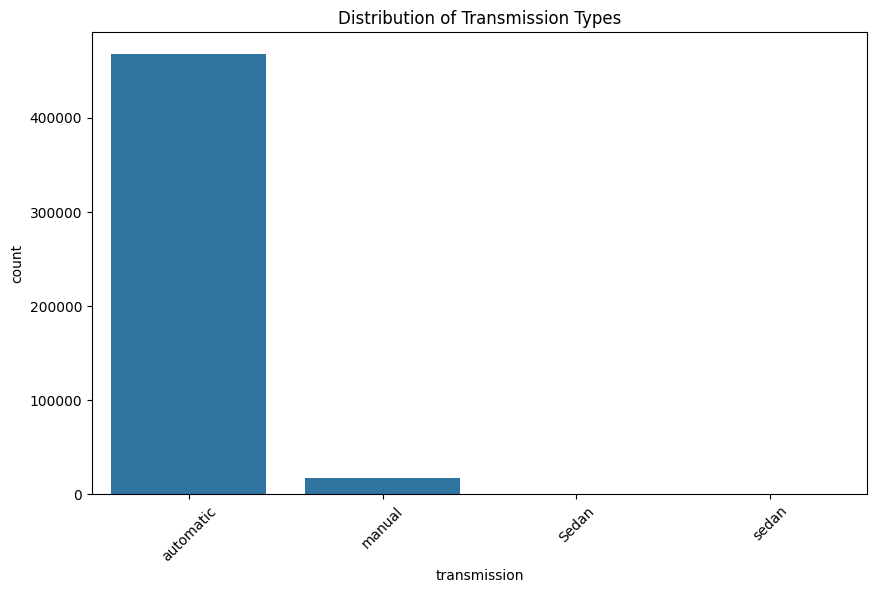

In [64]:
# Frequency Analysis
print(df_data['transmission'].value_counts())

# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='transmission', data=df_data)
plt.title('Distribution of Transmission Types')
plt.xticks(rotation=45)
plt.show()

Mari kita drop data dengan value `Sedan` dan `sedan` yeah..





In [65]:
# Drop rows where the 'transmission' column contains "Sedan" or "sedan"
df_data = df_data[~df_data['transmission'].str.contains('Sedan|sedan', case=False, na=False)]

Let's Recheck

transmission
automatic    467655
manual        16940
Name: count, dtype: int64


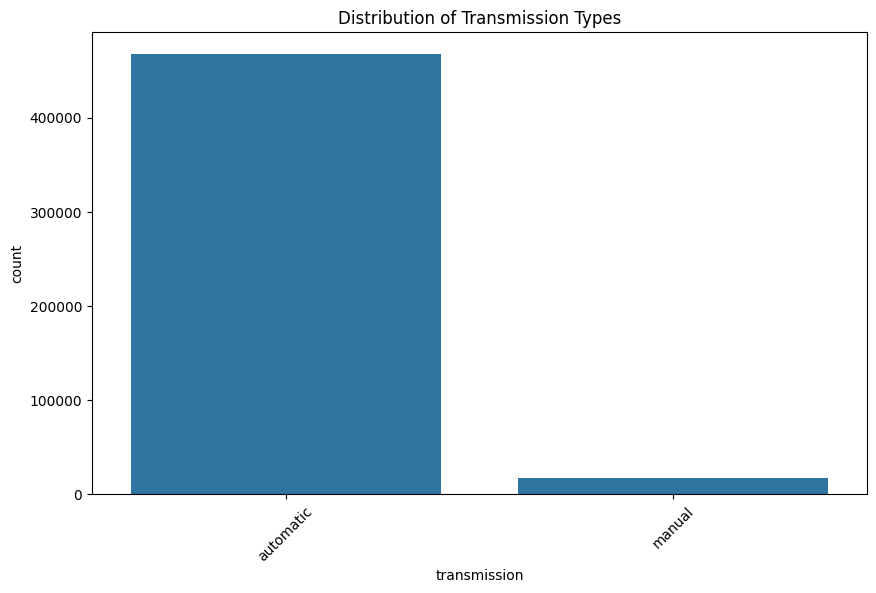

In [66]:
# Frequency Analysis
print(df_data['transmission'].value_counts())

# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='transmission', data=df_data)
plt.title('Distribution of Transmission Types')
plt.xticks(rotation=45)
plt.show()

Next, kita drop data Null

In [67]:
# Filter untuk nilai Null di kolom 'transmission' dan pilih kolom yang diinginkan
null_make = df_data[df_data['transmission'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['make'])

# Tampilkan baris dengan nilai Null di kolom 'transmission'
print("Baris dengan Nilai Null di Kolom 'transmission':")
display(null_make)

Baris dengan Nilai Null di Kolom 'transmission':


,make,model,trim,body,transmission,vin
31304,Acura,MDX,SH-AWD w/Technology Package,SUV,NaN,5fryd4h42eb018738
358163,Acura,MDX,Base,SUV,NaN,2hnyd2h25ch505518
409475,Acura,TL,SH-AWD,Sedan,NaN,19uua9f23ca005446
409477,Acura,TSX,Base,Sedan,NaN,jh4cu2f49cc023527
440791,Acura,MDX,Base,SUV,NaN,2hnyd2h29ch545732
...,...,...,...,...,...,...
65522,vw,jetta,comfrtline,Sedan,NaN,3vwdk7aj4bm008711
26583,vw,jetta,gls 1.8t,Sedan,NaN,3vwse29m23m041921
65506,vw,jetta,comfrtline,Sedan,NaN,3vwdl7ajxbm007124
27667,vw,jetta,gls 1.8t,Sedan,NaN,3vwse29m02m183926


Cukup banyak ya data `transmission` yang kosong

There is 2 Method we can bring
- Dropping the Data
- Data Imputation



***Data Dropping***

In [68]:
# Assuming your DataFrame is called 'df'
df_data = df_data.dropna(subset=['transmission'])

In [69]:
# Filter untuk nilai Null di kolom 'transmission' dan pilih kolom yang diinginkan
null_make = df_data[df_data['transmission'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['make'])

# Tampilkan baris dengan nilai Null di kolom 'transmission'
print("Baris dengan Nilai Null di Kolom 'transmission':")
display(null_make)

Baris dengan Nilai Null di Kolom 'transmission':


,make,model,trim,body,transmission,vin


***KNN Imputation*** (Optional)

Imputation adalah salah satu metode untuk mengganti Data yang Kosong (NULL) dengan memprediksi Data yang kosong dari data yang tersedia

*Untuk kali ini, kita bakal drop datanya aja ya! Kalo mau gunain Imputation, i'll  put the source code below!*

In [70]:
# import pandas as pd
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import OrdinalEncoder

In [71]:
# # Encode categorical features
# categorical_features = ['make', 'model', 'trim', 'body']
# encoder = OrdinalEncoder()
# data[categorical_features] = encoder.fit_transform(data[categorical_features])

# # Create a KNNImputer object
# imputer = KNNImputer(n_neighbors=5)

# # Fit the imputer and transform the data
# features_for_imputation = ['make', 'model', 'trim', 'body', 'transmission']
# data[features_for_imputation] = imputer.fit_transform(data[features_for_imputation])

# # Decode the 'transmission' column (optional)
# data['transmission'] = encoder.inverse_transform(data[['transmission']].astype(int))

#### VIN Data Row
- **Issues** : Data Null.
- **Action** : Dropping and Modify the Data.

In [72]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_make = df_data[df_data['vin'].isnull()][['make', 'model','trim','body', 'transmission', 'vin']].sort_values(by=['make'])

# Tampilkan baris dengan nilai Null di kolom 'make'
print("Baris dengan Nilai Null di Kolom 'vin':")
print(null_make)

Baris dengan Nilai Null di Kolom 'vin':
Empty DataFrame
Columns: [make, model, trim, body, transmission, vin]
Index: []


In [73]:
# Frequency Analysis
print(df_data['vin'].value_counts())

vin
wddgf56x78f009940    4
1ftfw1cv5afb30053    4
5uxfe43579l274932    4
wp0ca2988xu629622    4
5n1ar1nn2bc632869    4
                    ..
2c4rc1bg6er256381    1
2c4rc1bg4er292635    1
2c4rc1bg7er256325    1
2c4rc1bg7er395533    1
1ftfw1et2eke87277    1
Name: count, Length: 477803, dtype: int64


In [74]:
print("Data serta Column yang terduplikat")
display(df_data[df_data.duplicated(subset=['vin'], keep=False)][['transmission', 'vin', 'state', 'condition', 'odometer']].sort_values(by=['vin']))

Data serta Column yang terduplikat


,transmission,vin,state,condition,odometer
218119,automatic,19uua5663ya022038,fl,19.0,105431.0
49021,automatic,19uua5663ya022038,fl,19.0,105420.0
160618,manual,19uua65596a059705,nj,26.0,89661.0
344335,manual,19uua65596a059705,nj,25.0,89741.0
136582,automatic,19uua66215a070166,ca,37.0,131725.0
...,...,...,...,...,...
253325,automatic,zamce39a460025306,ca,29.0,92655.0
487782,automatic,zamce39a470026893,ca,34.0,46128.0
204238,automatic,zamce39a470026893,ca,27.0,46087.0
415070,automatic,zfbcfabh4ez025834,fl,47.0,13513.0


Untuk mengatasi VIN dengan banyak duplikat ini, kita bakalan ambil data VIN dengan Odometer tertinggi saja ya!

In [75]:
# Sort the df_DataFrame by 'odometer' in descending order
df_data = df_data.sort_values('odometer', ascending=False)

# Drop duplicate 'vin' values, keeping the first occurrence (highest 'odometer')
df_data = df_data.drop_duplicates(subset=['vin'], keep='first')

In [76]:
print("Data serta Column yang terduplikat")
display(df_data[df_data.duplicated(subset=['vin'], keep=False)][['transmission', 'vin', 'state', 'condition', 'odometer']].sort_values(by=['vin']))

Data serta Column yang terduplikat


,transmission,vin,state,condition,odometer


#### State Data Row
- **Issues** : Data Null.
- **Action** : Dropping and Modify the Data.

In [77]:
# Dapatkan jumlah nilai untuk kolom 'state'
state_counts = df_data['state'].value_counts()

# Filter untuk state yang dimulai dengan "3vwd"
highlighted_states = state_counts[state_counts.index.str.startswith('3vwd')]

# Filter dan urutkan df_data untuk kolom yang diinginkan
filtered_df = df_data[['transmission', 'vin', 'state', 'condition', 'odometer']].sort_values(by=['state'])

# Sekarang, 'filtered_df' berisi data Anda, dan 'highlighted_states' menyoroti state tertentu

# Misalnya, Kamu dapat memfilter 'filtered_df' untuk baris di mana 'state' berada di 'highlighted_states.index'
filtered_highlighted_df = filtered_df[filtered_df['state'].isin(highlighted_states.index)]

print("\nDataFrame yang Difilter dengan State yang Disorot:")
print(filtered_highlighted_df)


DataFrame yang Difilter dengan State yang Disorot:
Empty DataFrame
Columns: [transmission, vin, state, condition, odometer]
Index: []


state
fl    75937
ca    66561
tx    42434
ga    30880
pa    24109
nj    23090
il    22222
oh    20337
tn    19141
nc    18811
mo    15335
mi    14183
nv    11856
md     9876
va     9387
wi     9374
mn     9032
az     8048
wa     7094
co     6335
ma     6231
ny     5435
ne     3907
sc     3870
in     3852
pr     2439
la     2045
ut     1761
ms     1724
hi     1208
or     1047
nm      163
ok       54
al       25
Name: count, dtype: int64


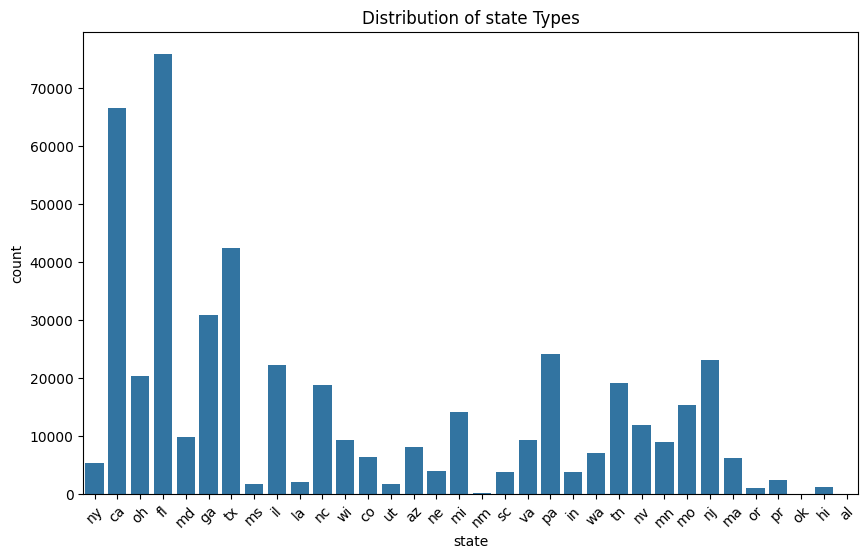

In [78]:
# Frequency Analysis
print(df_data['state'].value_counts())

# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='state', data=df_data)
plt.title('Distribution of state Types')
plt.xticks(rotation=45)
plt.show()

In [79]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_state = df_data[df_data['state'].isnull()][['state','make', 'model','body', 'transmission']].sort_values(by=['make'])

# Tampilkan baris dengan nilai Null di kolom 'state'
print("Baris dengan Nilai Null di Kolom 'state':")
print(null_state)

Baris dengan Nilai Null di Kolom 'state':
Empty DataFrame
Columns: [state, make, model, body, transmission]
Index: []


Sepertinya data Kotor dari `state` secara langsung sudah dibersihkan dari Cleaning yang lain, lanjut ajaa

#### Condition Data Row
- **Issues** : Data Null.
- **Action** : Dropping and Modify the Data.

In [80]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_condition = df_data[df_data['condition'].isnull()][['condition','make', 'model','body', 'transmission']].sort_values(by=['make'])

# Tampilkan baris dengan nilai Null di kolom 'condition'
print("Baris dengan Nilai Null di Kolom 'condition':")
print(null_condition)

Baris dengan Nilai Null di Kolom 'condition':
       condition        make   model       body transmission
29146        NaN       Acura      TL      Sedan    automatic
42171        NaN       Acura     TSX      Sedan    automatic
26606        NaN       Acura     RSX  Hatchback       manual
29120        NaN       Acura      TL      Sedan    automatic
16949        NaN       Acura     RDX        SUV    automatic
...          ...         ...     ...        ...          ...
23533        NaN  volkswagen  passat      Sedan    automatic
7345         NaN  volkswagen  passat      Sedan    automatic
23479        NaN  volkswagen  passat      Sedan    automatic
23490        NaN  volkswagen  passat      Sedan    automatic
29463        NaN          vw  beetle      Sedan       manual

[9564 rows x 5 columns]


Drop the `Condition` data

In [81]:
# Assuming your DataFrame is called 'df'
df_data = df_data.dropna(subset=['condition'])

In [82]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_condition = df_data[df_data['condition'].isnull()][['condition','make', 'model','body', 'transmission']].sort_values(by=['make'])

# Tampilkan baris dengan nilai Null di kolom 'condition'
print("Baris dengan Nilai Null di Kolom 'condition':")
print(null_condition)

Baris dengan Nilai Null di Kolom 'condition':
Empty DataFrame
Columns: [condition, make, model, body, transmission]
Index: []


#### Odometer Data Row
- **Issues** : Data Null.
- **Action** : Dropping and Modify the Data.

In [83]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_odometer = df_data[df_data['odometer'].isnull()][['odometer','make', 'model','body', 'transmission']].sort_values(by=['make'])

# Tampilkan baris dengan nilai Null di kolom 'odometer'
print("Baris dengan Nilai Null di Kolom 'odometer':")
print(null_odometer)

Baris dengan Nilai Null di Kolom 'odometer':
        odometer           make           model          body transmission
442975       NaN            BMW              X5           SUV    automatic
233787       NaN            BMW        7 Series         Sedan    automatic
27791        NaN          Buick           Regal         Sedan    automatic
411097       NaN          Buick         LeSabre         Sedan    automatic
350629       NaN          Buick           Regal         Sedan    automatic
558359       NaN      Chevrolet             HHR         wagon    automatic
39694        NaN      Chevrolet        Colorado      Crew Cab    automatic
409607       NaN      Chevrolet          Malibu         Sedan    automatic
253989       NaN          Dodge  Sprinter Cargo           Van    automatic
325127       NaN           Ford          Fiesta     Hatchback       manual
527660       NaN           Ford           F-150     supercrew    automatic
22558        NaN           Ford           Focus        

Let's drop the Null mate

In [84]:
df_data = df_data.dropna(subset=['odometer'])

<ipython-input-85-5f0fcf1215f8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['odometer_range'] = pd.cut(df_data['odometer'], bins=bins, labels=labels, right=False)


Value Counts untuk Rentang Odometer:
1-50: 1116
51 - 100: 84
101-1000: 736
1001-10000: 19983
10001-20000: 49353
>50000: 396950


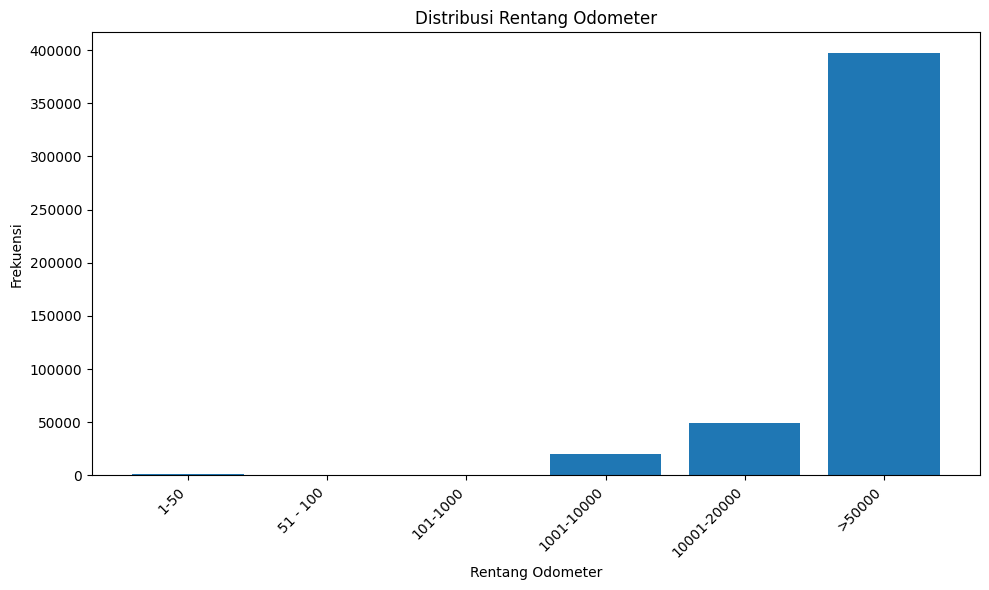

In [85]:
# Membuat bin untuk rentang odometer
bins = [1,50, 100, 1000, 10000, 20000, float('inf')]  # float('inf') untuk nilai > 50000
labels = ['1-50','51 - 100', '101-1000', '1001-10000', '10001-20000', '>50000']

# Menetapkan data ke bin dan menghitung kemunculan
df_data['odometer_range'] = pd.cut(df_data['odometer'], bins=bins, labels=labels, right=False)
odometer_counts = df_data['odometer_range'].value_counts().sort_index()

# Menampilkan value counts untuk setiap rentang odometer
print("Value Counts untuk Rentang Odometer:")
for range_label, count in odometer_counts.items():
    print(f"{range_label}: {count}")

# Membuat diagram batang
plt.figure(figsize=(10, 6))  # Menyesuaikan ukuran gambar sesuai kebutuhan
plt.bar(odometer_counts.index, odometer_counts.values)
plt.title('Distribusi Rentang Odometer')
plt.xlabel('Rentang Odometer')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x agar lebih mudah dibaca
plt.tight_layout()  # Menyesuaikan tata letak untuk mencegah label tumpang tindih
plt.show()

#### Color Data Row
- **Issues** : Data Null.
- **Action** : Dropping and Modify the Data.

In [86]:
# Frequency Analysis
print(df_data['color'].value_counts())

color
black        92167
white        88510
silver       70488
gray         69878
blue         42711
red          36925
—            21875
gold          9485
green         9219
burgundy      7537
beige         7386
brown         5557
orange        1739
purple        1261
off-white     1228
yellow        1052
charcoal       422
turquoise      189
pink            39
lime            12
Name: count, dtype: int64


In [87]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_color = df_data[df_data['color'].isnull()][['color','make', 'model','body', 'transmission']].sort_values(by=['make'])

# Tampilkan baris dengan nilai Null di kolom 'color'
print("Baris dengan Nilai Null di Kolom 'color':")
print(null_color)

Baris dengan Nilai Null di Kolom 'color':
       color   make     model         body transmission
118636   NaN  Acura        TL        Sedan    automatic
529595   NaN   Audi        S5        coupe    automatic
493093   NaN   Audi        A4        Sedan    automatic
482463   NaN    BMW  5 Series        Sedan    automatic
74353    NaN    BMW  1 Series  Convertible       manual
...      ...    ...       ...          ...          ...
462081   NaN  Volvo       S80        Sedan    automatic
200365   NaN  Volvo       S40        Sedan    automatic
454155   NaN  Volvo      XC60          SUV    automatic
454612   NaN  Volvo       S60        Sedan    automatic
103860   NaN    bmw     750li        Sedan    automatic

[542 rows x 5 columns]


In [88]:
df_data = df_data.dropna(subset=['color'])

In [89]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_color = df_data[df_data['color'].isnull()][['color','make', 'model','body', 'transmission']].sort_values(by=['make'])

# Tampilkan baris dengan nilai Null di kolom 'color'
print("Baris dengan Nilai Null di Kolom 'color':")
print(null_color)

Baris dengan Nilai Null di Kolom 'color':
Empty DataFrame
Columns: [color, make, model, body, transmission]
Index: []


Data kotornya udah dibersihin juga nih..

Lanjyut~

#### Interior Data Row
- **Issues** : Data Null.
- **Action** : Dropping and Modify the Data.

interior
black        207458
gray         151349
beige         49991
tan           37409
—              9806
brown          7021
red            1110
silver          988
blue            927
off-white       350
purple          282
gold            281
white           208
green           205
burgundy        156
orange          120
yellow           19
Name: count, dtype: int64


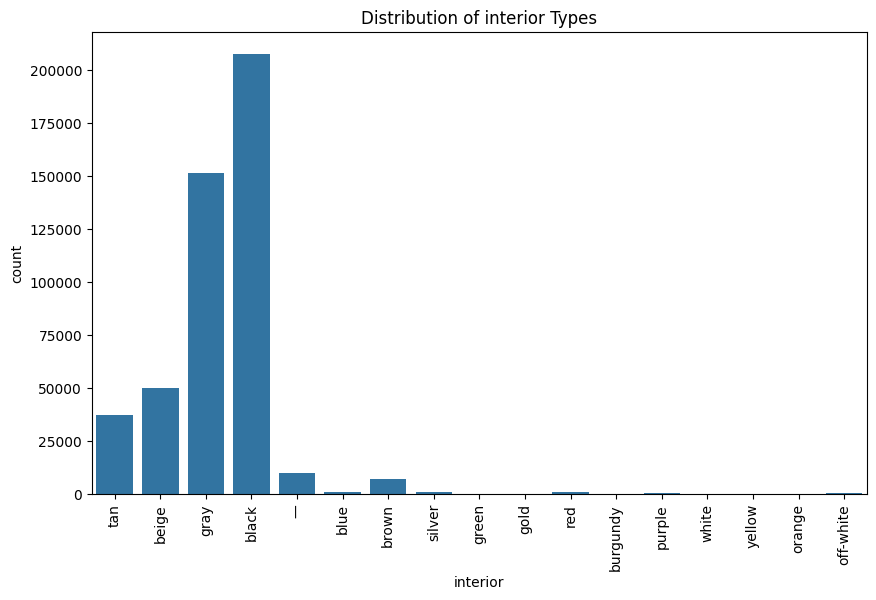

In [90]:
# Frequency Analysis
print(df_data['interior'].value_counts())

# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='interior', data=df_data)
plt.title('Distribution of interior Types')
plt.xticks(rotation=90)
plt.show()

In [91]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_interior = df_data[df_data['interior'].isnull()][['interior','make', 'model','body', 'transmission']].sort_values(by=['make'])

# Tampilkan baris dengan nilai Null di kolom 'interior'
print("Baris dengan Nilai Null di Kolom 'interior':")
print(null_interior)

Baris dengan Nilai Null di Kolom 'interior':
Empty DataFrame
Columns: [interior, make, model, body, transmission]
Index: []


Datanya udah bersih juga nih, mari kita lanjutkan~

#### Seller Data Row
- **Issues** : Data Null.
- **Action** : Dropping and Modify the Data.

In [92]:
# Frequency Analysis
print(df_data['seller'].value_counts())

seller
ford motor credit company llc          17556
the hertz corporation                  16164
nissan-infiniti lt                     15674
santander consumer                     14058
avis corporation                       11399
                                       ...  
atlantic coast remarketing inc/dwci        1
alexia motors inc                          1
wilson premier hyundai                     1
byers volvo                                1
titlemax/el paso tx14                      1
Name: count, Length: 11904, dtype: int64


In [93]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_seller = df_data[df_data['seller'].isnull()][['seller','make', 'model','body', 'transmission']].sort_values(by=['make'])

# Tampilkan baris dengan nilai Null di kolom 'seller'
print("Baris dengan Nilai Null di Kolom 'seller':")
print(null_seller)

Baris dengan Nilai Null di Kolom 'seller':
Empty DataFrame
Columns: [seller, make, model, body, transmission]
Index: []


#### MMR Data Row
- **Issues** : Data Null.
- **Action** : Dropping and Modify the Data.

In [94]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_make = df_data[df_data['mmr'].isnull()][['mmr','condition','make','transmission', 'vin']].sort_values(by=['make'])

# Buat Analisa lebih dalam, coba ganti sort_values dengan kolom lain seperti `transmission`

# Tampilkan baris dengan nilai Null di kolom 'make'
print("Baris dengan Nilai Null di Kolom 'mmr':")
print(null_make)

Baris dengan Nilai Null di Kolom 'mmr':
        mmr  condition      make transmission                vin
429644  NaN       25.0  Chrysler    automatic  1c3ccbbb9dn718531
406524  NaN       27.0  Chrysler    automatic  2c3ccaag9dh723146
457803  NaN       19.0     Dodge    automatic  2c3cdxbg6dh688757
429660  NaN       34.0     Dodge    automatic  1c3cdzcg5dn741076
522495  NaN       26.0      Ford    automatic  3fahp0jg5cr241590
429786  NaN        3.0   Hyundai    automatic  kmhct4ae7du450468
306447  NaN       19.0   Hyundai    automatic  5npeb4ac6dh687932
543129  NaN       19.0   Hyundai    automatic  kmhct4ae0eu650738
457035  NaN       19.0   Hyundai    automatic  5npdh4ae3eh504144
537706  NaN       25.0       Kia    automatic  knaft4a22c5559983
431905  NaN       19.0       Kia    automatic  kndjt2a5xd7765280


Let's Drop the Null MMR

In [95]:
df_data = df_data.dropna(subset=['mmr'])

Value Counts untuk Rentang mmr:
1-50: 18
51 - 100: 56
101-1000: 7265
1001-10000: 163393
>10000: 296937


<ipython-input-96-c5d0a054dd53>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['mmr_range'] = pd.cut(df_data['mmr'], bins=bins, labels=labels, right=False)


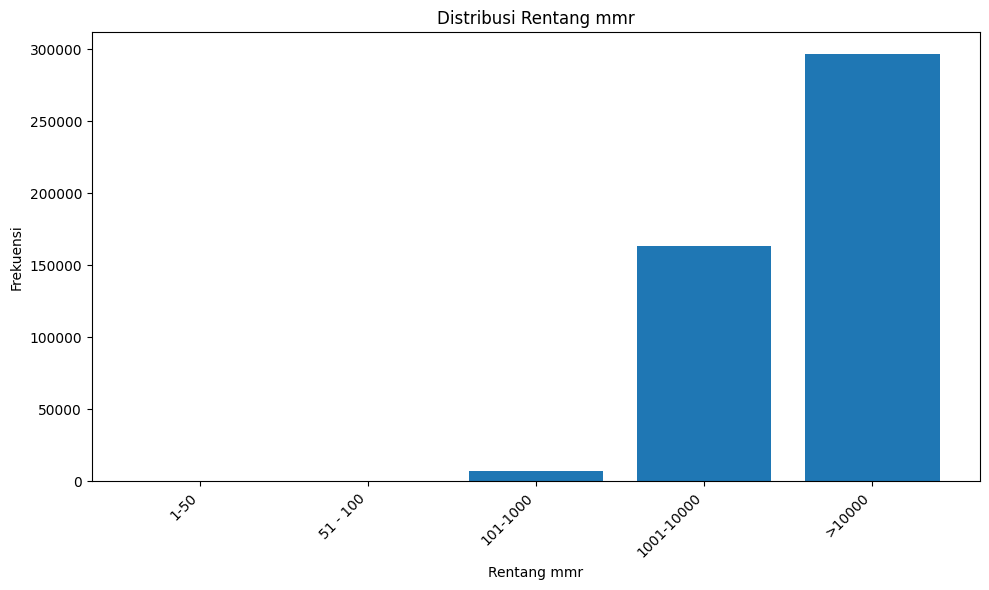

In [96]:
# Membuat bin untuk rentang mmr
bins = [1,50, 100, 1000, 10000, float('inf')]  # float('inf') untuk nilai > 50000
labels = ['1-50','51 - 100', '101-1000', '1001-10000', '>10000']

# Menetapkan data ke bin dan menghitung kemunculan
df_data['mmr_range'] = pd.cut(df_data['mmr'], bins=bins, labels=labels, right=False)
mmr_counts = df_data['mmr_range'].value_counts().sort_index()

# Menampilkan value counts untuk setiap rentang mmr
print("Value Counts untuk Rentang mmr:")
for range_label, count in mmr_counts.items():
    print(f"{range_label}: {count}")

# Membuat diagram batang
plt.figure(figsize=(10, 6))  # Menyesuaikan ukuran gambar sesuai kebutuhan
plt.bar(mmr_counts.index, mmr_counts.values)
plt.title('Distribusi Rentang mmr')
plt.xlabel('Rentang mmr')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x agar lebih mudah dibaca
plt.tight_layout()  # Menyesuaikan tata letak untuk mencegah label tumpang tindih
plt.show()

In [97]:
df_data = df_data[~df_data['mmr'].between(1, 100)]

In [98]:
# Membuat bin untuk rentang mmr
bins = [1,50, 100, 1000, 10000, float('inf')]  # float('inf') untuk nilai > 50000
labels = ['1-50','51 - 100', '101-1000', '1001-10000', '>10000']

# Menetapkan data ke bin dan menghitung kemunculan
df_data['mmr_range'] = pd.cut(df_data['mmr'], bins=bins, labels=labels, right=False)
mmr_counts = df_data['mmr_range'].value_counts().sort_index()

# Menampilkan value counts untuk setiap rentang mmr
print("Value Counts untuk Rentang mmr:")
for range_label, count in mmr_counts.items():
    print(f"{range_label}: {count}")

Value Counts untuk Rentang mmr:
1-50: 0
51 - 100: 0
101-1000: 7240
1001-10000: 163393
>10000: 296937


<ipython-input-98-e76a5a053ae9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['mmr_range'] = pd.cut(df_data['mmr'], bins=bins, labels=labels, right=False)


#### SellingPrice Data Row
- **Issues** : Data Null.
- **Action** : Dropping and Modify the Data.

In [99]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_make = df_data[df_data['sellingprice'].isnull()][['sellingprice','condition','make','transmission', 'vin']].sort_values(by=['make'])

# Buat Analisa lebih dalam, coba ganti sort_values dengan kolom lain seperti `transmission`

# Tampilkan baris dengan nilai Null di kolom 'make'
print("Baris dengan Nilai Null di Kolom 'sellingprice':")
print(null_make)

Baris dengan Nilai Null di Kolom 'sellingprice':
Empty DataFrame
Columns: [sellingprice, condition, make, transmission, vin]
Index: []


<ipython-input-100-08765d733a22>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['sellingprice_range'] = pd.cut(df_data['sellingprice'], bins=bins, labels=labels, right=False)


Value Counts untuk Rentang sellingprice:
1-50: 1
51 - 100: 0
101-1000: 11617
1001-10000: 162406
>10000: 293546


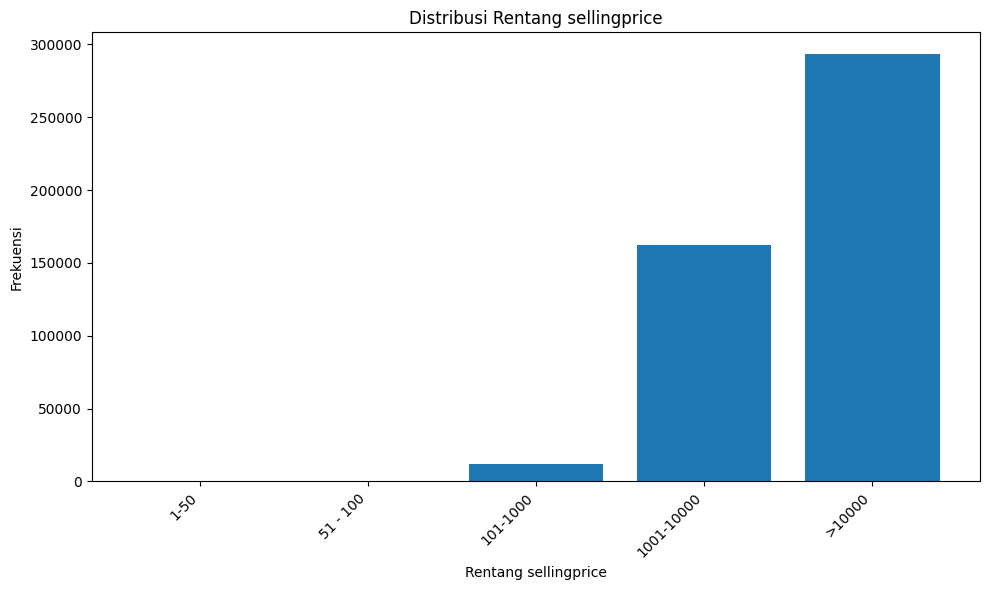

In [100]:
# Membuat bin untuk rentang sellingprice
bins = [1,50, 100, 1000, 10000, float('inf')]  # float('inf') untuk nilai > 50000
labels = ['1-50','51 - 100', '101-1000', '1001-10000', '>10000']

# Menetapkan data ke bin dan menghitung kemunculan
df_data['sellingprice_range'] = pd.cut(df_data['sellingprice'], bins=bins, labels=labels, right=False)
sellingprice_counts = df_data['sellingprice_range'].value_counts().sort_index()

# Menampilkan value counts untuk setiap rentang sellingprice
print("Value Counts untuk Rentang sellingprice:")
for range_label, count in sellingprice_counts.items():
    print(f"{range_label}: {count}")

# Membuat diagram batang
plt.figure(figsize=(10, 6))  # Menyesuaikan ukuran gambar sesuai kebutuhan
plt.bar(sellingprice_counts.index, sellingprice_counts.values)
plt.title('Distribusi Rentang sellingprice')
plt.xlabel('Rentang sellingprice')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x agar lebih mudah dibaca
plt.tight_layout()  # Menyesuaikan tata letak untuk mencegah label tumpang tindih
plt.show()

Let's drop the only data di 1-50

In [101]:
df_data = df_data[~df_data['sellingprice'].between(1, 100)]

In [102]:
# Membuat bin untuk rentang sellingprice
bins = [1,50, 100, 1000, 10000, float('inf')]  # float('inf') untuk nilai > 50000
labels = ['1-50','51 - 100', '101-1000', '1001-10000', '>10000']

# Menetapkan data ke bin dan menghitung kemunculan
df_data['sellingprice_range'] = pd.cut(df_data['sellingprice'], bins=bins, labels=labels, right=False)
sellingprice_counts = df_data['sellingprice_range'].value_counts().sort_index()

# Menampilkan value counts untuk setiap rentang sellingprice
print("Value Counts untuk Rentang sellingprice:")
for range_label, count in sellingprice_counts.items():
    print(f"{range_label}: {count}")

Value Counts untuk Rentang sellingprice:
1-50: 0
51 - 100: 0
101-1000: 11605
1001-10000: 162406
>10000: 293546


<ipython-input-102-d7302c355a3e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['sellingprice_range'] = pd.cut(df_data['sellingprice'], bins=bins, labels=labels, right=False)


#### SellingDate Data Row
- **Issues** :
  - Data Null
  - Data Type is not on `datetime`
- **Action** :
  - Dropping and Modify the Data.
  - Changing the datatype

In [103]:
# Filter untuk nilai Null di kolom 'make' dan pilih kolom yang diinginkan
null_make = df_data[df_data['saledate'].isnull()][['saledate','condition','make','transmission', 'vin']].sort_values(by=['make'])

# Buat Analisa lebih dalam, coba ganti sort_values dengan kolom lain seperti `transmission`

# Tampilkan baris dengan nilai Null di kolom 'make'
print("Baris dengan Nilai Null di Kolom 'saledate':")
print(null_make)

Baris dengan Nilai Null di Kolom 'saledate':
Empty DataFrame
Columns: [saledate, condition, make, transmission, vin]
Index: []


In [104]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467557 entries, 485268 to 202241
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   year                467557 non-null  int64   
 1   make                467557 non-null  object  
 2   model               467545 non-null  object  
 3   trim                467557 non-null  object  
 4   body                467557 non-null  object  
 5   transmission        467557 non-null  object  
 6   vin                 467557 non-null  object  
 7   state               467557 non-null  object  
 8   condition           467557 non-null  float64 
 9   odometer            467557 non-null  float64 
 10  color               467557 non-null  object  
 11  interior            467557 non-null  object  
 12  seller              467557 non-null  object  
 13  mmr                 467557 non-null  float64 
 14  sellingprice        467557 non-null  float64 
 15  saledate         

Mari kita Remove TimeZonenya

Time zone yang mana? yang ini sih

Tue Feb 10 2015 01:30:00 **GMT-0800 (PST)**

In [105]:
display(df_data['saledate'])

,saledate
485268,Wed Jun 03 2015 02:00:00 GMT-0700 (PDT)
321728,Tue Feb 17 2015 05:00:00 GMT-0800 (PST)
275,Tue Jan 27 2015 04:00:00 GMT-0800 (PST)
58330,Tue Dec 30 2014 13:00:00 GMT-0800 (PST)
279980,Thu Feb 12 2015 07:00:00 GMT-0800 (PST)
...,...
404385,Tue Mar 10 2015 01:30:00 GMT-0700 (PDT)
155279,Wed Jan 21 2015 02:00:00 GMT-0800 (PST)
404851,Thu Mar 12 2015 05:00:00 GMT-0700 (PDT)
404909,Wed Mar 11 2015 03:20:00 GMT-0700 (PDT)


In [106]:
df_data['saledate'] = pd.to_datetime(df_data['saledate'], utc=True)

<ipython-input-106-be30d1592ef4>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_data['saledate'] = pd.to_datetime(df_data['saledate'], utc=True)


In [107]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467557 entries, 485268 to 202241
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   year                467557 non-null  int64              
 1   make                467557 non-null  object             
 2   model               467545 non-null  object             
 3   trim                467557 non-null  object             
 4   body                467557 non-null  object             
 5   transmission        467557 non-null  object             
 6   vin                 467557 non-null  object             
 7   state               467557 non-null  object             
 8   condition           467557 non-null  float64            
 9   odometer            467557 non-null  float64            
 10  color               467557 non-null  object             
 11  interior            467557 non-null  object             
 12  seller          

In [108]:
df_data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,odometer_range,mmr_range,sellingprice_range
485268,2005,Mercedes-Benz,S-Class,S500 4MATIC,Sedan,automatic,wdbng84j05a442389,ny,1.0,999999.0,black,tan,santander consumer,2725.0,1700.0,2015-06-02 19:00:00+00:00,>50000,1001-10000,1001-10000
321728,1998,Lexus,ES 300,Base,Sedan,automatic,jt8bf28g4w5037146,ca,2.0,999999.0,gray,beige,800 loan mart,650.0,350.0,2015-02-16 21:00:00+00:00,>50000,101-1000,101-1000
275,2013,Hyundai,Elantra Coupe,GS,Elantra Coupe,automatic,kmhdh6ae8du017422,ca,1.0,999999.0,blue,gray,hyundai motor finance,8025.0,2500.0,2015-01-26 20:00:00+00:00,>50000,1001-10000,1001-10000
58330,2006,chrysler,300,4x2 v8 c srt8,Sedan,automatic,2c3la73wx6h536417,oh,1.0,999999.0,silver,black,santander consumer,7700.0,2600.0,2014-12-30 05:00:00+00:00,>50000,1001-10000,1001-10000
279980,2007,Chevrolet,Tahoe,LT,SUV,automatic,1gnfc13j97r145854,fl,19.0,999999.0,blue,gray,innovate loan servicing corp,6150.0,6900.0,2015-02-11 23:00:00+00:00,>50000,1001-10000,1001-10000


####Data Cleaning Completed!

## Exploratory Data Analysis (EDA)

EDA Berfungsi untuk
- Memahami Struktur Data
- Menemukan Pola dan Hubungan
- Perumusan Hipotesis

Apa aja yang bakal kita lakuin di fase ini?
- Describe data yang udah kita cleaning
- Melihat Data Distribution pada Data
  - Data Kategorikal?
  - Data Numerikal?
    - Data Diskrit?
    - Data Kontinu?
- Melihat Data Skewness
- Melihat Korelasi antar data
- Linearitas dengan `SellingPrice`

### Explore Datasets

In [109]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467557 entries, 485268 to 202241
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   year                467557 non-null  int64              
 1   make                467557 non-null  object             
 2   model               467545 non-null  object             
 3   trim                467557 non-null  object             
 4   body                467557 non-null  object             
 5   transmission        467557 non-null  object             
 6   vin                 467557 non-null  object             
 7   state               467557 non-null  object             
 8   condition           467557 non-null  float64            
 9   odometer            467557 non-null  float64            
 10  color               467557 non-null  object             
 11  interior            467557 non-null  object             
 12  seller          

Kita drop dulu `odometer_range`, `mmr_range`,`sellingprice_range`

In [110]:
df_data = df_data.drop(columns=['odometer_range', 'mmr_range', 'sellingprice_range'])

In [111]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467557 entries, 485268 to 202241
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   year          467557 non-null  int64              
 1   make          467557 non-null  object             
 2   model         467545 non-null  object             
 3   trim          467557 non-null  object             
 4   body          467557 non-null  object             
 5   transmission  467557 non-null  object             
 6   vin           467557 non-null  object             
 7   state         467557 non-null  object             
 8   condition     467557 non-null  float64            
 9   odometer      467557 non-null  float64            
 10  color         467557 non-null  object             
 11  interior      467557 non-null  object             
 12  seller        467557 non-null  object             
 13  mmr           467557 non-null  float64      

In [112]:
df_data.describe(include="all")

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,467557.000000,467557,467545,467557,467557,467557,467557,467557,467557.000000,467557.000000,467557,467557,467557,467557.000000,467557.000000,467557
unique,NaN,90,922,1856,84,2,467557,34,NaN,NaN,20,17,11903,NaN,NaN,NaN
top,NaN,Ford,Altima,Base,Sedan,automatic,wdbng84j05a442389,fl,NaN,NaN,black,black,ford motor credit company llc,NaN,NaN,NaN
freq,NaN,79912,16229,47967,210676,451454,1,74442,NaN,NaN,92152,207442,17556,NaN,NaN,NaN
mean,2010.200438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.775349,66849.112624,NaN,NaN,NaN,13820.568027,13682.014182,2015-03-07 05:42:56.183438336+00:00
min,1989.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,125.000000,150.000000,2014-01-01 01:15:00+00:00
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.000000,28110.000000,NaN,NaN,NaN,7400.000000,7100.000000,2015-01-21 17:30:00+00:00
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,51105.000000,NaN,NaN,NaN,12300.000000,12200.000000,2015-02-16 17:30:00+00:00
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,96941.000000,NaN,NaN,NaN,18250.000000,18200.000000,2015-05-21 19:00:00+00:00
max,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000,999999.000000,NaN,NaN,NaN,182000.000000,230000.000000,2015-07-20 19:30:00+00:00


Sebelum kita analisa lebih jauh, akan lebih baik kalo kita Encode dulu data Kategorikal menjadi Numerikal dengan Encoding!

#### Categorical Encoding

In [113]:
df = df_data.copy()

In [114]:
categorical_cols = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior']
encoders = {}  # Store encoders for each column

for col in categorical_cols:
    # Create and fit LabelEncoder
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

    # Create a DataFrame to store encoding information for the current column
    encoding_info = pd.DataFrame({
        'Original_Value': encoders[col].classes_,
        'Encoded_Value': encoders[col].transform(encoders[col].classes_)
    })

    # Save encoding information to a separate file (optional)
    encoding_info.to_csv(f'{col}_encoding_info.csv', index=False)

In [115]:
df.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
404385,2008,84,816,1747,24,0,wmeej31x28k151987,16,3.0,1.0,1,1,metrolina auto group llc,4975.0,2200.0,2015-03-09 18:30:00+00:00
155279,2006,36,611,17,36,0,3n1cb51d26l455937,29,2.0,1.0,14,1,titlemax/el paso tx14,5100.0,1700.0,2015-01-20 18:00:00+00:00
404851,2009,49,143,526,36,0,4t1be46k99u876271,1,17.0,1.0,0,0,world omni/santander,10600.0,1000.0,2015-03-11 22:00:00+00:00
404909,2005,49,143,912,36,0,4t1be32k75u974354,29,24.0,1.0,15,6,titlemax/san antonio tx24,7250.0,2100.0,2015-03-10 20:20:00+00:00
202241,2012,24,610,955,28,0,kndmg4c76c6452999,26,1.0,1.0,2,6,oriental bank,13050.0,6000.0,2015-02-04 18:00:00+00:00


Color Encoding

In [116]:
c_enc = pd.read_csv("/content/color_encoding_info.csv")

In [117]:
display(c_enc)

,Original_Value,Encoded_Value
0,beige,0
1,black,1
2,blue,2
3,brown,3
4,burgundy,4
5,charcoal,5
6,gold,6
7,gray,7
8,green,8
9,lime,9


Interior Encoding

In [118]:
i_enc = pd.read_csv("/content/interior_encoding_info.csv")

In [119]:
display(i_enc)

,Original_Value,Encoded_Value
0,beige,0
1,black,1
2,blue,2
3,brown,3
4,burgundy,4
5,gold,5
6,gray,6
7,green,7
8,off-white,8
9,orange,9


Maker Encoding

In [120]:
maker_enc = pd.read_csv("/content/make_encoding_info.csv")

In [121]:
display(maker_enc)

,Original_Value,Encoded_Value
0,Acura,0
1,Aston Martin,1
2,Audi,2
3,BMW,3
4,Bentley,4
...,...,...
85,subaru,85
86,suzuki,86
87,toyota,87
88,volkswagen,88


Model Encoding

In [122]:
model_enc = pd.read_csv("/content/model_encoding_info.csv")

In [123]:
display(model_enc)

,Original_Value,Encoded_Value
0,1,0
1,1 Series,1
2,1500,2
3,190-Class,3
4,2 Series,4
...,...,...
918,xB,918
919,xD,919
920,yaris,920
921,yukon,921


State Encoding

In [124]:
s_enc = pd.read_csv("/content/state_encoding_info.csv")

In [125]:
display(s_enc)

,Original_Value,Encoded_Value
0,al,0
1,az,1
2,ca,2
3,co,3
4,fl,4
5,ga,5
6,hi,6
7,il,7
8,in,8
9,la,9


Transmission Encoding

In [126]:
trans_enc = pd.read_csv("/content/transmission_encoding_info.csv")

In [127]:
display(trans_enc)

,Original_Value,Encoded_Value
0,automatic,0
1,manual,1


Trim Encoding

In [128]:
trim_enc = pd.read_csv("/content/trim_encoding_info.csv")

In [129]:
display(trim_enc)

,Original_Value,Encoded_Value
0,!,0
1,& coun fwd,1
2,& coun fwd limited,2
3,& coun fwd lx,3
4,& country lx,4
...,...,...
1851,xr,1851
1852,xr-7,1852
1853,yuk xl 4x2 slt,1853
1854,z06,1854


And then let's deep dive!

### Data Distributions

In [130]:
categorical_feature = df.select_dtypes(include='object').columns.tolist()

numerical_feature = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
discrete_feature = [col for col in numerical_feature if len(df[col].unique()) < 25]
continuous_feature = [col for col in numerical_feature if col not in discrete_feature]

print(f'Number of Categorical Feature : {len(categorical_feature)}')
print(f'Number of Numerical Feature : {len(numerical_feature)}')
print(f'Number of Discrete Feature : {len(discrete_feature)}')
print(f'Number of Continuous Feature : {len(continuous_feature)}')

Number of Categorical Feature : 2
Number of Numerical Feature : 13
Number of Discrete Feature : 3
Number of Continuous Feature : 10


Data kita punya lebih banyak data numerikal karena sebagian data kategorikal sudah kita *Encode*!

###Data Skewness

transmission    5.106000
mmr             2.062075
sellingprice    2.017186
odometer        1.875321
body            1.264332
interior        1.250346
make            0.719055
state           0.386217
model           0.320143
color          -0.066310
trim           -0.338442
condition      -0.841767
year           -1.206719
dtype: float64


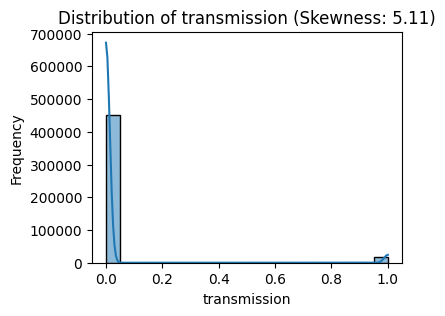

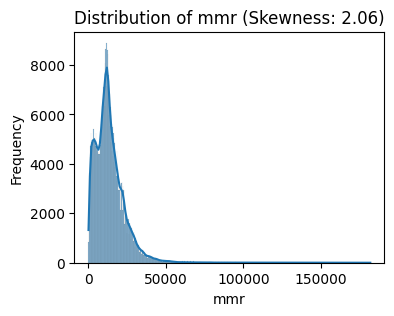

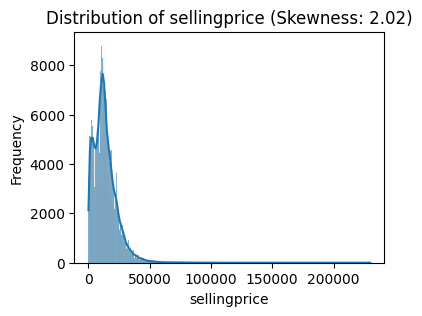

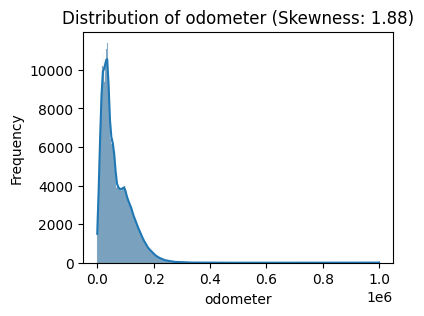

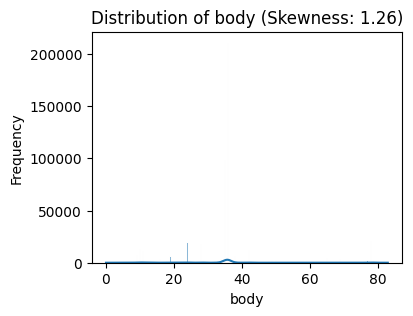

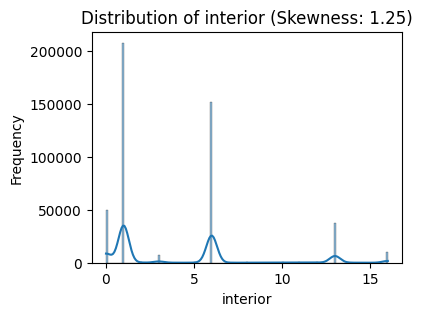

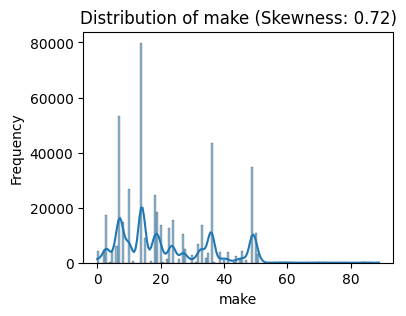

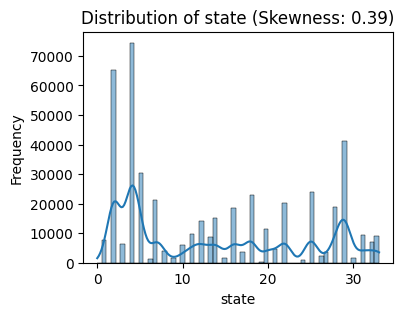

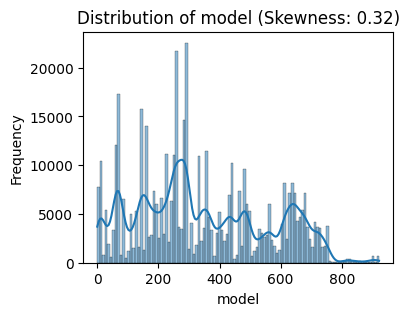

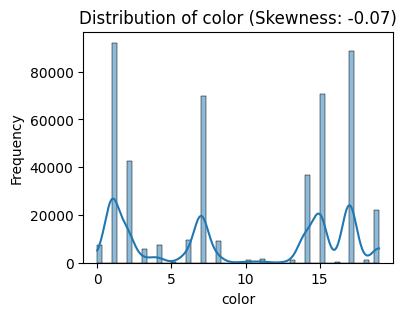

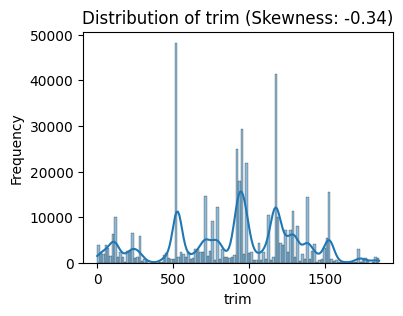

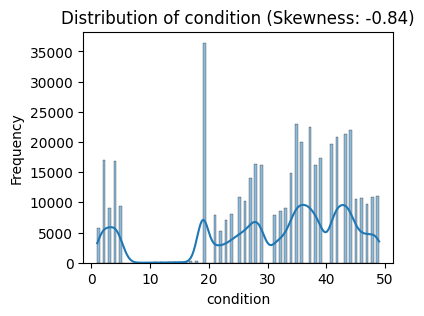

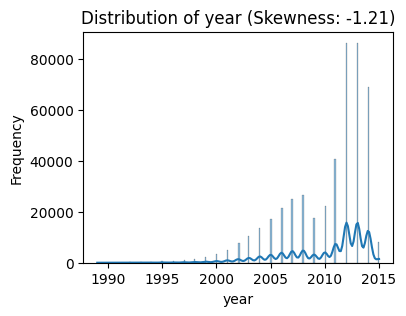

In [131]:
skewness = df[numerical_feature].skew().sort_values(ascending=False)
print(skewness)

for feature in skewness.index:
  plt.figure(figsize=(4, 3))
  sns.histplot(df[feature], kde=True)  # Histogram with KDE
  plt.title(f'Distribution of {feature} (Skewness: {skewness[feature]:.2f})')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()

Variasi Skewness pada data berbeda beda, ada yang Left Skewed dan Right Skewed

*PS : Pada Kasus Data Pre-Processing, Data yang Skewnessnya lebih dari 1 dan kurang dari -1 akan ditransformasi, karena data yang melebihi atau kurang dari angka tersebut dapat mempengaruhi hasil data*

###Data Correlation

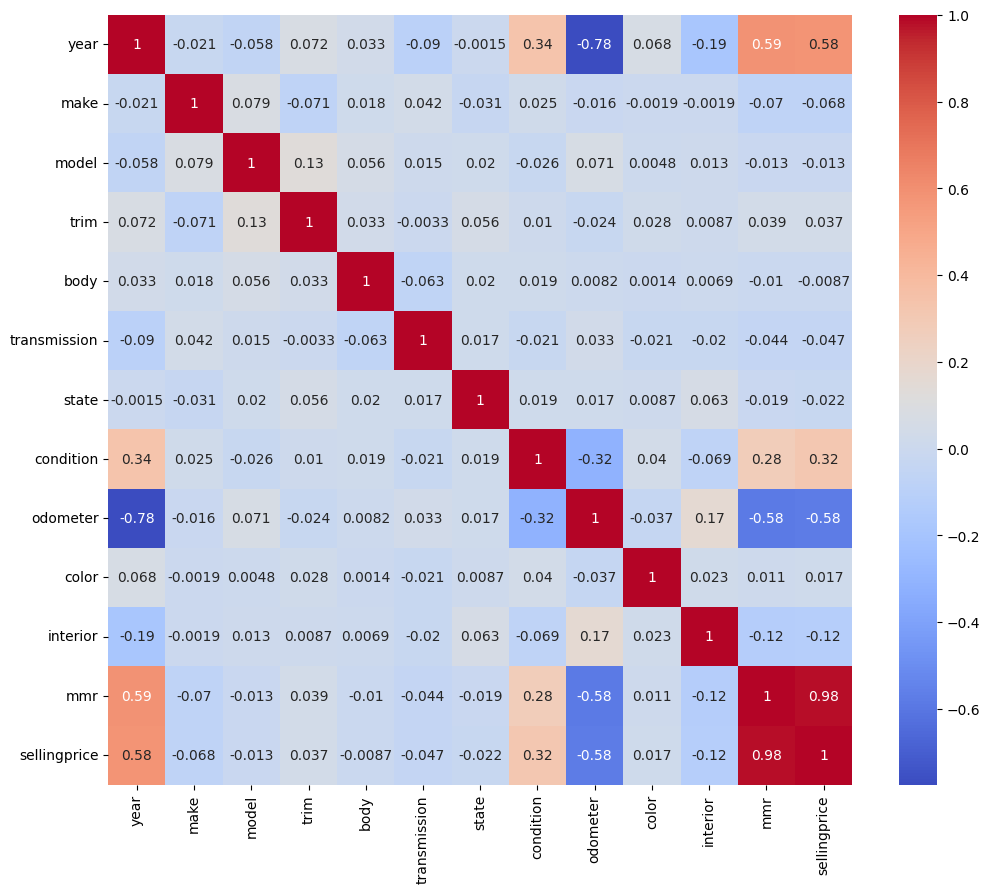

In [132]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=['number'])

# Check if numeric_data has any columns and non-missing values
if numeric_data.empty or numeric_data.isnull().all().all():
    print("Error: No numeric data available or all numeric data is missing.")
else:
    # Calculate the correlation matrix
    correlation_matrix = numeric_data.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.show()

###Linearitas dengan `sellingprice`

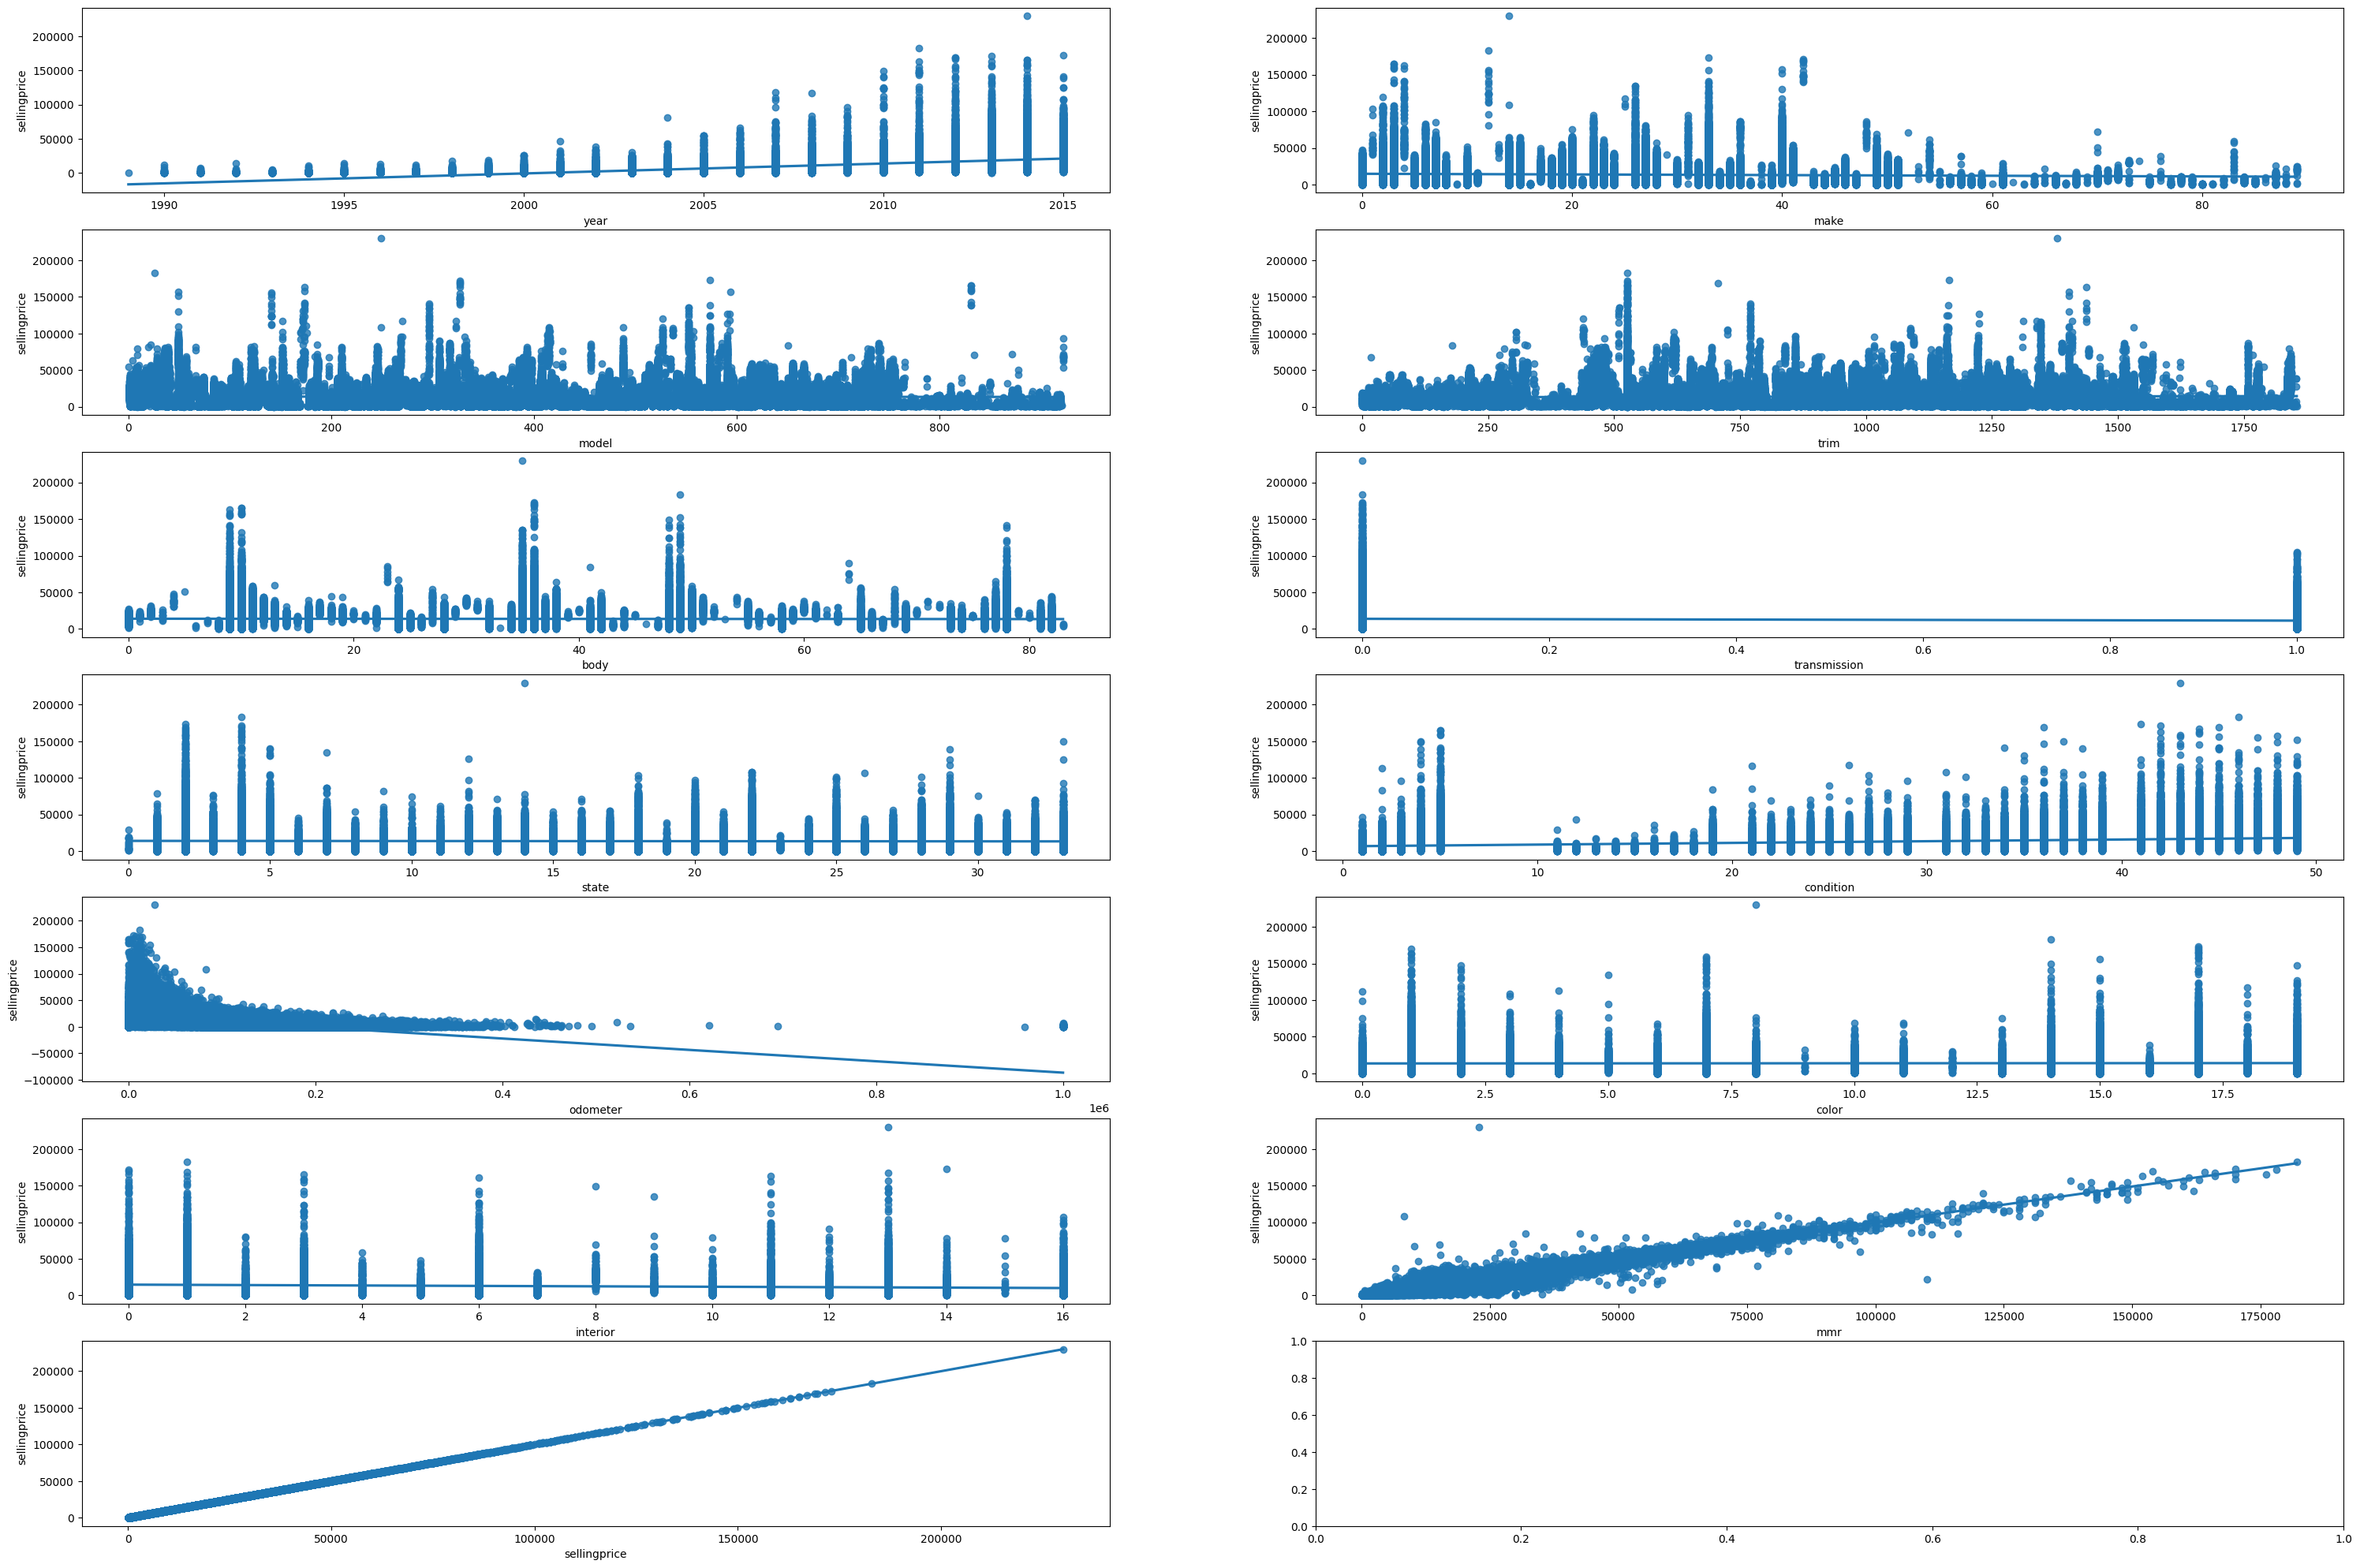

In [137]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(37, 25)) # Changed nrows to 7 for 13 features

for i, feature in enumerate(numerical_feature):
    sns.regplot(data=df, x=feature, y='sellingprice', ax=axes[i // 2, i % 2]) # Changed indexing to match the new shape

plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1 : What factors influence vehicle pricing the most? (e.g., mileage, brand, model, condition, year)

**Step Method**
-

In [ ]:
# Select numeric features (including 'selling_price')
numeric_features = df_data.select_dtypes(include=['number']).columns.tolist()

# Calculate the correlation matrix
correlation_matrix = df_data[numeric_features].corr()

# Focus on correlations with 'selling_price'
price_correlations = correlation_matrix['sellingprice'].sort_values(ascending=False)

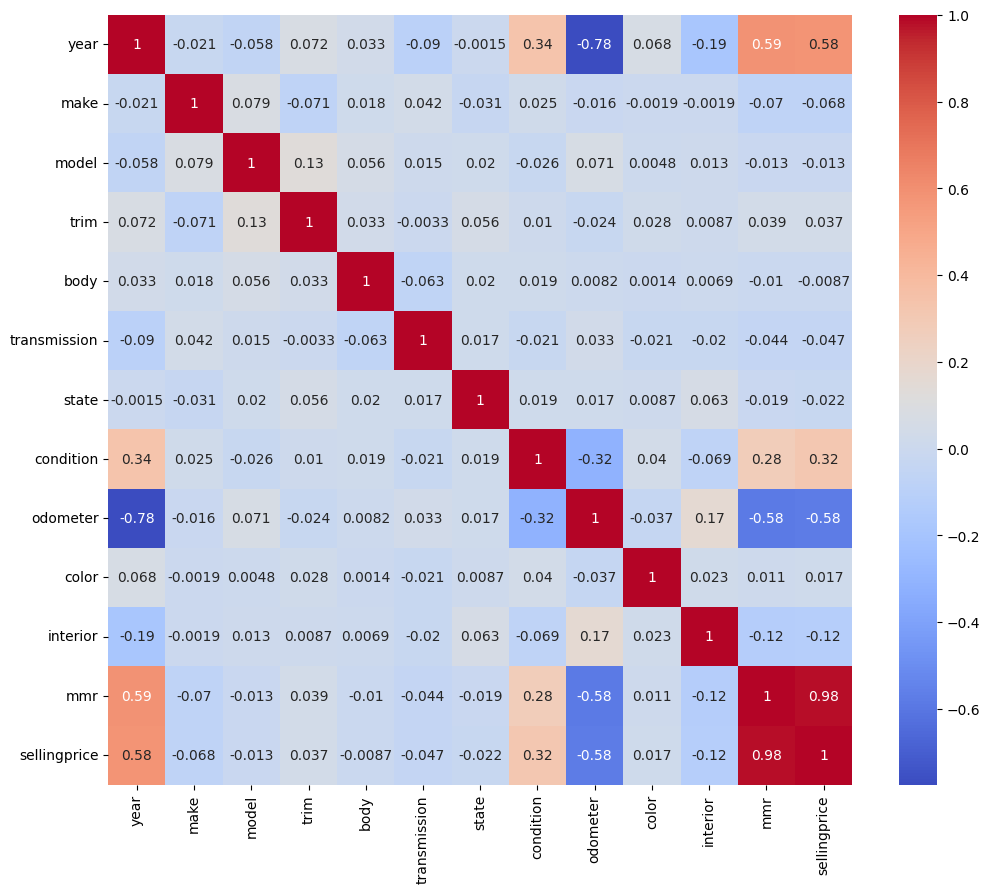

In [138]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=['number'])

# Check if numeric_data has any columns and non-missing values
if numeric_data.empty or numeric_data.isnull().all().all():
    print("Error: No numeric data available or all numeric data is missing.")
else:
    # Calculate the correlation matrix
    correlation_matrix = numeric_data.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.show()

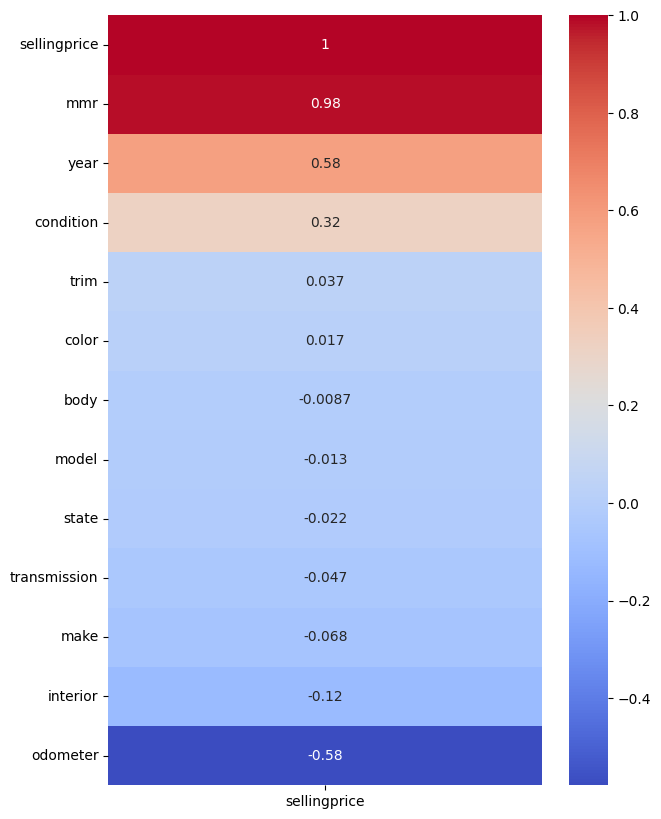

In [141]:
# Calculate correlation matrix
corr_data = df.select_dtypes(include=np.number).corr(method='pearson')

# Select correlations with sellingprice and order them
ordered_correlations = corr_data[['sellingprice']].sort_values(
    by='sellingprice', ascending=False
)

# Plot the heatmap
plt.figure(figsize=(7, 10))
sns.heatmap(data=ordered_correlations, cmap='coolwarm', annot=True, fmt='.2g')
plt.show()

### Pertanyaan 2 : Which car brands/models retain their value best over time?

## Conclusion

**1st Question :** Which is the Highest Frequency on Buying Customer by City in our E-Commerce?

In [ ]:
# Filter for successful orders
successful_orders = orders_df[orders_df['order_status'] == 'delivered']

# Merge with customer data to get city information
order_city_data = pd.merge(successful_orders, customer_df, on='customer_id')

# Group by city and count the number of purchases
top_cities = order_city_data.groupby('customer_city').size().sort_values(ascending=False).head(10)
print(top_cities)

customer_city
sao paulo                15045
rio de janeiro            6601
belo horizonte            2697
brasilia                  2071
curitiba                  1489
campinas                  1406
porto alegre              1342
salvador                  1188
guarulhos                 1144
sao bernardo do campo      911
dtype: int64


The Highest Buyer by City is our Customer from **Sao Paulo**

**2nd Question :** Which is the Top Product and Top Seller in our E -Commerce?

In [ ]:
# Merge DataFrames
merged_df = orderitems_df.merge(products_df, on='product_id', how='left') \
                           .merge(sellers_df, on='seller_id', how='left')

# Calculate total sales per product
top_products = merged_df.groupby('product_id').agg({'price': 'sum'}).reset_index()
top_products.columns = ['product_id', 'total_sales']

# Merge to get product names and categories
top_products = top_products.merge(products_df[['product_id', 'product_category_name']], on='product_id', how='left')

# Sort and select top 10 products
top_10_products = top_products.sort_values(by='total_sales', ascending=False).head(10)

# Calculate total sales per seller
top_sellers = merged_df.groupby('seller_id').agg({'price': 'sum'}).reset_index()
top_sellers.columns = ['seller_id', 'total_sales']

# Merge to get seller cities and states
top_sellers = top_sellers.merge(sellers_df[['seller_id', 'seller_city', 'seller_state']], on='seller_id', how='left')

# Sort and select top 10 sellers
top_10_sellers = top_sellers.sort_values(by='total_sales', ascending=False).head(10)

# Display the results
print("Top 10 Products:")
print(top_10_products[['product_category_name', 'total_sales']])

Top 10 Products:
        product_category_name  total_sales
24086            beleza_saude     63885.00
14068            beleza_saude     54730.20
27613                     pcs     48899.34
27039  informatica_acessorios     47214.51
19742         cama_mesa_banho     43025.56
8051   informatica_acessorios     41082.60
4996                    bebes     38907.32
12351              cool_stuff     37733.90
10867      relogios_presentes     37683.42
22112        moveis_decoracao     37608.90


In [ ]:
print("\nTop 10 Sellers:")
print(top_10_sellers[['seller_id','seller_city', 'seller_state', 'total_sales']])


Top 10 Sellers:
                             seller_id       seller_city seller_state  \
857   4869f7a5dfa277a7dca6462dcf3b52b2           guariba           SP   
1013  53243585a1d6dc2643021fd1853d8905  lauro de freitas           BA   
881   4a3ca9315b744ce9f8e9374361493884          ibitinga           SP   
3024  fa1c13f2614d7b5c4749cbc52fecda94            sumare           SP   
1535  7c67e1448b00f6e969d365cea6b010ab   itaquaquecetuba           SP   
1560  7e93a43ef30c4f03f38b393420bc753a           barueri           SP   
2643  da8622b14eb17ae2831f4ac5b9dab84a        piracicaba           SP   
1505  7a67c85e85bb2ce8582c35f2203ad736         sao paulo           SP   
192   1025f0e2d44d7041d6cf58b6550e0bfa         sao paulo           SP   
1824  955fee9216a65b617aa5c0531780ce60         sao paulo           SP   

      total_sales  
857     229472.63  
1013    222776.05  
881     200472.92  
3024    194042.03  
1535    187923.89  
1560    176431.87  
2643    160236.57  
1505    141745.53  

The Top Product is **Beleza Saude** with the Number of *63885*

The Top Seller is from **Guariba** City with the ID of **4869f7a5dfa277a7dca6462dcf3b52b2** reaching the total Sales of *229472* items

**3rd Question :** How Effective it is our Product Flow from Buyed to Sended in our E-Commerce?

In [ ]:
# Convert to datetime if not already
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

# Filter for delivered orders and calculate the time taken
delivered_orders = orders_df[orders_df['order_status'] == 'delivered']
delivered_orders['delivery_duration'] = (delivered_orders['order_delivered_customer_date'] - delivered_orders['order_purchase_timestamp']).dt.days

# Summary statistics on delivery time
delivery_summary = delivered_orders['delivery_duration'].describe()

# Calculate min and max delivery durations
min_delivery_time = delivered_orders['delivery_duration'].min()
max_delivery_time = delivered_orders['delivery_duration'].max()

# Define efficiency thresholds (close to minimum is considered efficient)
threshold_min = min_delivery_time + (max_delivery_time - min_delivery_time) * 0.25  # Top 25% efficient
threshold_max = max_delivery_time - (max_delivery_time - min_delivery_time) * 0.25  # Bottom 25% inefficient

# Count the number of deliveries in each efficiency category
efficient_deliveries = delivered_orders[delivered_orders['delivery_duration'] <= threshold_min].shape[0]
inefficient_deliveries = delivered_orders[delivered_orders['delivery_duration'] >= threshold_max].shape[0]
total_deliveries = delivered_orders.shape[0]

# Calculate the efficiency percentages for efficient and inefficient deliveries
efficient_percentage = (efficient_deliveries / total_deliveries) * 100
inefficient_percentage = (inefficient_deliveries / total_deliveries) * 100

# General efficiency rates based on average delivery time
average_delivery_time = delivery_summary['mean']
general_efficient_deliveries = delivered_orders[delivered_orders['delivery_duration'] <= average_delivery_time].shape[0]
general_inefficient_deliveries = delivered_orders[delivered_orders['delivery_duration'] > average_delivery_time].shape[0]

# Calculate the general efficiency percentages
general_efficient_percentage = (general_efficient_deliveries / total_deliveries) * 100
general_inefficient_percentage = (general_inefficient_deliveries / total_deliveries) * 100

C:\Users\adity\AppData\Local\Temp\ipykernel_20888\1511412117.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders['delivery_duration'] = (delivered_orders['order_delivered_customer_date'] - delivered_orders['order_purchase_timestamp']).dt.days


In [ ]:
print(f"Minimum Delivery Time: {min_delivery_time} days")
print(f"Maximum Delivery Time: {max_delivery_time} days")
print(f"Efficient Deliveries (Top 25%): {efficient_percentage:.2f}%")
print(f"Inefficient Deliveries (Bottom 25%): {inefficient_percentage:.2f}%")

print(f"Average Delivery Time: {average_delivery_time:.2f} days")
print(f"General Efficient Deliveries (Faster than or equal to average): {general_efficient_percentage:.2f}%")
print(f"General Inefficient Deliveries (Slower than average): {general_inefficient_percentage:.2f}%")

Minimum Delivery Time: 0.0 days
Maximum Delivery Time: 209.0 days
Efficient Deliveries (Top 25%): 99.45%
Inefficient Deliveries (Bottom 25%): 0.02%
Average Delivery Time: 12.09 days
General Efficient Deliveries (Faster than or equal to average): 64.14%
General Inefficient Deliveries (Slower than average): 35.85%


Our Product Efficiency is **64.14%** with the average of **12 Days**

**4th Question :**  Which Payment Method used in Buying the Items in our E-Commerce?

In [ ]:
# Group by payment type and count occurrences
payment_methods = payment_df.groupby('payment_type').size().sort_values(ascending=False)

print(payment_methods)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
dtype: int64


Most used Payment is **Credit Card**

**5th Question :**  When is the "Prime Time" and "Dead Time" of our Customer in Buying Stuff?

In [ ]:
# Extract hour from purchase timestamp
orders_df['purchase_hour'] = orders_df['order_purchase_timestamp'].dt.hour

# Group by hour to see purchase activity
purchase_activity = orders_df.groupby('purchase_hour').size()

# Find the Prime Time (hour with the highest purchase activity)
prime_time_hour = purchase_activity.idxmax()
prime_time_count = purchase_activity.max()

# Find the Dead Time (hour with the lowest purchase activity)
dead_time_hour = purchase_activity.idxmin()
dead_time_count = purchase_activity.min()


# Display the Prime Time and Dead Time
print(f"The Customer Prime Time: {prime_time_hour}:00 with {prime_time_count} purchases.")
print(f"The Customer Dead Time: {dead_time_hour}:00 with {dead_time_count} purchases.")

The Customer Prime Time: 16:00 with 6675 purchases.
The Customer Dead Time: 5:00 with 188 purchases.


**6th Question :** How big is the Purchase Growth on this E-Commerce?

In [ ]:
# Extract year and month from purchase timestamp
orders_df['purchase_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Group by month and count the number of orders
purchase_growth = orders_df.groupby('purchase_month').size()

# Calculate the percentage change from month to month
monthly_percentage_change = purchase_growth.pct_change() * 100

# Calculate the overall percentage growth or decline
initial_orders = purchase_growth.iloc[0]  # Orders in the first month
final_orders = purchase_growth.iloc[-2]   # Orders in the last of the second month

overall_percentage_change = ((final_orders - initial_orders) / initial_orders) * 100

print(f"Overall Purchase Growth from first to last month: {overall_percentage_change:.2f}%")

Overall Purchase Growth from first to last month: 300.00%


The Purchase Growth is Surging to **300%**

##### Final Conclusion
- Which is the Highest Frequency on Buying Customer by City in our E-Commerce?
    - The Largest Buyer by City is **Sao Paulo**, this research concludes that we need to increasing our **Customer Service Quality** in some of the highest rating City, for other cities will be focusing on expanding our E - Commerce uses because the gap between The Highest and other city is pretty big , also we need more newer data to see our Selling Activities
- Which is the Top Product and Top Seller in our E -Commerce?
    - The Top Product for our E - Commerce is **Beleza Saude**, this conclusion will help us to giving some strategies to maintain and growing our product selling through several strategies (Voucher, Discount, Prime Time buying, etc.)
    - The Top Seller for our E - Commerce is from **Guariba** City with the ID of **4869f7a5dfa277a7dca6462dcf3b52b2** reaching the total Sales of *229472* items, from this insight also will helping us to analyze potential Sellers that we can synergize in terms of Production and Delivery to increasing Budget Efficiency
- How Effective it is our Product Flow from Buyed to Sended in our E-Commerce?
    - Our Product Efficiency is **64.14%** with the average of **12 Days**, its showing that we still need to improve our Delivery by Maximizing Warehouse Location
- Which Payment Method used in Buying the Items in our E-Commerce?
    - Most used Payment is **Credit Card**, this research concludes that we need to increasing our Credit Card payment variety with several bank to Maintaining our Payment Flow, other important things is to maintain our System so it doesnt face any Error
-  When is the "Prime Time" and "Dead Time" of our Customer in Buying Stuff?
    - The Customer Prime Time is **16:00** with **6675** purchases.
    - The Customer Dead Time is **5:00** with **188** purchases.
    - This Data will be Helpfull on Creating Strategy for Maximizing our Sellings (ie. Live Selling, Discount Hours, etc.)
- How big is the Purchase Growth on this E-Commerce?
    - Overall Purchase Growth from first to last month is **300.00%**
    - This is showing a Very Healthy growth from our E - Commerce
    - THe problem occured is the data incompleteness on the last 2 Months, so we have to improve it